## Análisis - Ligue 1 temporada 2015/2016 (masculina)

Vamos a hacer un análisis de las distintas competiciones (las cinco grandes ligas durante la temporada 2015-2016 y de todos los partidos en general) para poder entender que características son más importantes a la hora de tomar la decisión por parte del modelo de ML para decidir si el equipo va a ganar, perder o empatar el partido.

En este notebook en cuestión, vamos a analizar la Ligue 1 en la temporada 2015/2016 (masculina).

Cargamos los datos de los partidos sobre la competición para entrenar el modelo y poder hacer el estudio de explicabilidad.

In [1]:
import os
import pandas as pd


competition_name = "Ligue 1"
competition_gender = "male"
season_name = "2015/2016"
season_name_for_filename = "2015_2016"

output_dir = "data/reduced/"
filename = f"{competition_name}({season_name_for_filename}_{competition_gender})_reduced.csv"
output_path = os.path.join(output_dir, filename)

if os.path.exists(output_path):
    print(f"Matches from the competition loaded from {output_path}")
    matches_in_Ligue1 = pd.read_csv(output_path)
else:
    print("You don't have data from the competition yet. Please run the notebook '0_datasets_building.ipynb' first.")

Matches from the competition loaded from data/reduced/Ligue 1(2015_2016_male)_reduced.csv


In [2]:
matches_in_Ligue1.head(5)

,match_id,shots_on_target_ratio_home,shots_on_target_ratio_away,average_shots_on_target_distance_home,average_shots_on_target_distance_away,shots_inside_area_ratio_home,shots_inside_area_ratio_away,pass_success_ratio_home,pass_success_ratio_away,cross_success_ratio_home,...,percentage_shots_under_pressure_home,percentage_shots_inside_area_under_pressure_home,percentage_passes_under_pressure_home,percentage_passes_inside_area_under_pressure_home,percentage_set_piece_shots_home,percentage_set_piece_shots_inside_area_home,percentage_substitutions_home,percentage_tactical_substitutions_home,percentage_tactical_changes_home,percentage_formation_changes_home
0,3829421,0.333333,0.166667,25.129294,12.803802,0.555556,0.583333,0.763676,0.809074,0.307692,...,0.333333,0.333333,0.566265,1.0,0.555556,0.666667,0.5,0.50,0.750000,0.666667
1,3829420,0.307692,0.428571,20.107446,19.128651,0.230769,0.714286,0.747412,0.783058,0.500000,...,0.375000,0.166667,0.565217,0.5,0.500000,0.222222,0.5,0.40,0.444444,0.750000
2,3829413,0.166667,0.333333,21.737917,19.467647,0.333333,0.833333,0.798755,0.829213,0.200000,...,0.000000,0.000000,0.520000,0.0,0.666667,0.500000,0.5,0.50,0.500000,0.000000
3,3829416,0.333333,0.352941,12.209684,15.420536,0.666667,0.764706,0.741688,0.810964,0.250000,...,0.250000,0.285714,0.514085,0.0,0.384615,0.333333,0.5,0.25,0.625000,1.000000
4,3829422,0.227273,0.500000,20.112628,20.723704,0.500000,0.500000,0.876560,0.786082,0.142857,...,0.444444,0.600000,0.684564,1.0,0.875000,0.875000,0.5,0.50,0.500000,0.500000


Una vez ya tenemos los datos cargados, entrenamos el mejor modelo (seleccionado tras la experimentación) y mostramos sus resultados.

In [3]:
from src.analysis import ligue1_best_model

best_model_Ligue1, evaluation_metrics, X_train_Ligue1, X_test_Ligue1, encoder_Ligue1, match_ids_test = ligue1_best_model(matches_in_Ligue1)
print(f"The best model for Ligue 1 is {best_model_Ligue1}")
print(f"The evaluation metrics for the best model are:")
evaluation_metrics.head()

The best model for Ligue 1 is RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, n_estimators=60, random_state=42)
The evaluation metrics for the best model are:


,Train Accuracy,Test Accuracy,Precision Macro,Precision Weighted,Recall Macro,Recall Weighted,F1 Macro,F1 Weighted
Random Forest,0.774086,0.618421,0.591787,0.60164,0.589015,0.618421,0.581168,0.601067


Una vez ya tenemos el mejor modelo entrenado comenzamos el análisis de explicabilidad.

### Estudio global

Vamos a comenzar por un estudio global. 

En este caso, al ser el mejor modelo Random Forest, nos basaremos en la importancia de las características proporcionada por el modelo a través del método `feature_importances_`.
- A diferencia de la regresión logística, que asigna coeficientes específicos a cada clase, Random Forest evalúa la relevancia de cada variable para el modelo en su conjunto, sin distinguir entre clases.
- Este modelo captura tanto relaciones lineales como no lineales, permitiendo analizar interacciones entre múltiples factores y su impacto en la predicción del resultado.
- Sin embargo, no indica la dirección del efecto de cada característica (positiva o negativa), sino únicamente su importancia relativa en el rendimiento del modelo.

El gráfico presentado a continuación muestra la importancia global de cada característica en la predicción de los resultados de los partidos en la Ligue 1.
- Valores más altos indican que una característica tiene mayor peso en las predicciones del modelo.
- Valores cercanos a cero indican que la característica no aporta información significativa para la clasificación del resultado.

Este análisis nos permite identificar qué factores son clave en la predicción del resultado de los partidos, considerando relaciones más complejas y capturando patrones que un modelo lineal no podría detectar.

Features with zero importance across all classes:
['tackles_success_ratio_home', 'dribbles_success_ratio_away', 'possession_percentage_home', 'last_3_matches_form_home', 'is_valid_last_3_matches_form_home', 'is_valid_last_3_matches_form_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'is_valid_win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'is_valid_win_last_home_match_home_team', 'win_last_away_match_away_team', 'is_valid_win_last_away_match_away_team', 'goals_conceded_last_match_home', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'is_valid_goals_conceded_last_match_away', 'is_valid_goals_scored_last_match_home', 'goals_scored_last_match_away', 'is_valid_goals_scored_last_match_away', 'is_valid_std_shots_last_3_matches_home', 'percentage_shots_other_home', 'percentage_corners_home', 'percentage_recoveries_home', 'percentage_tackles_home', 'percentage_penaltys_committed_home', 'percentage_key_errors_home',

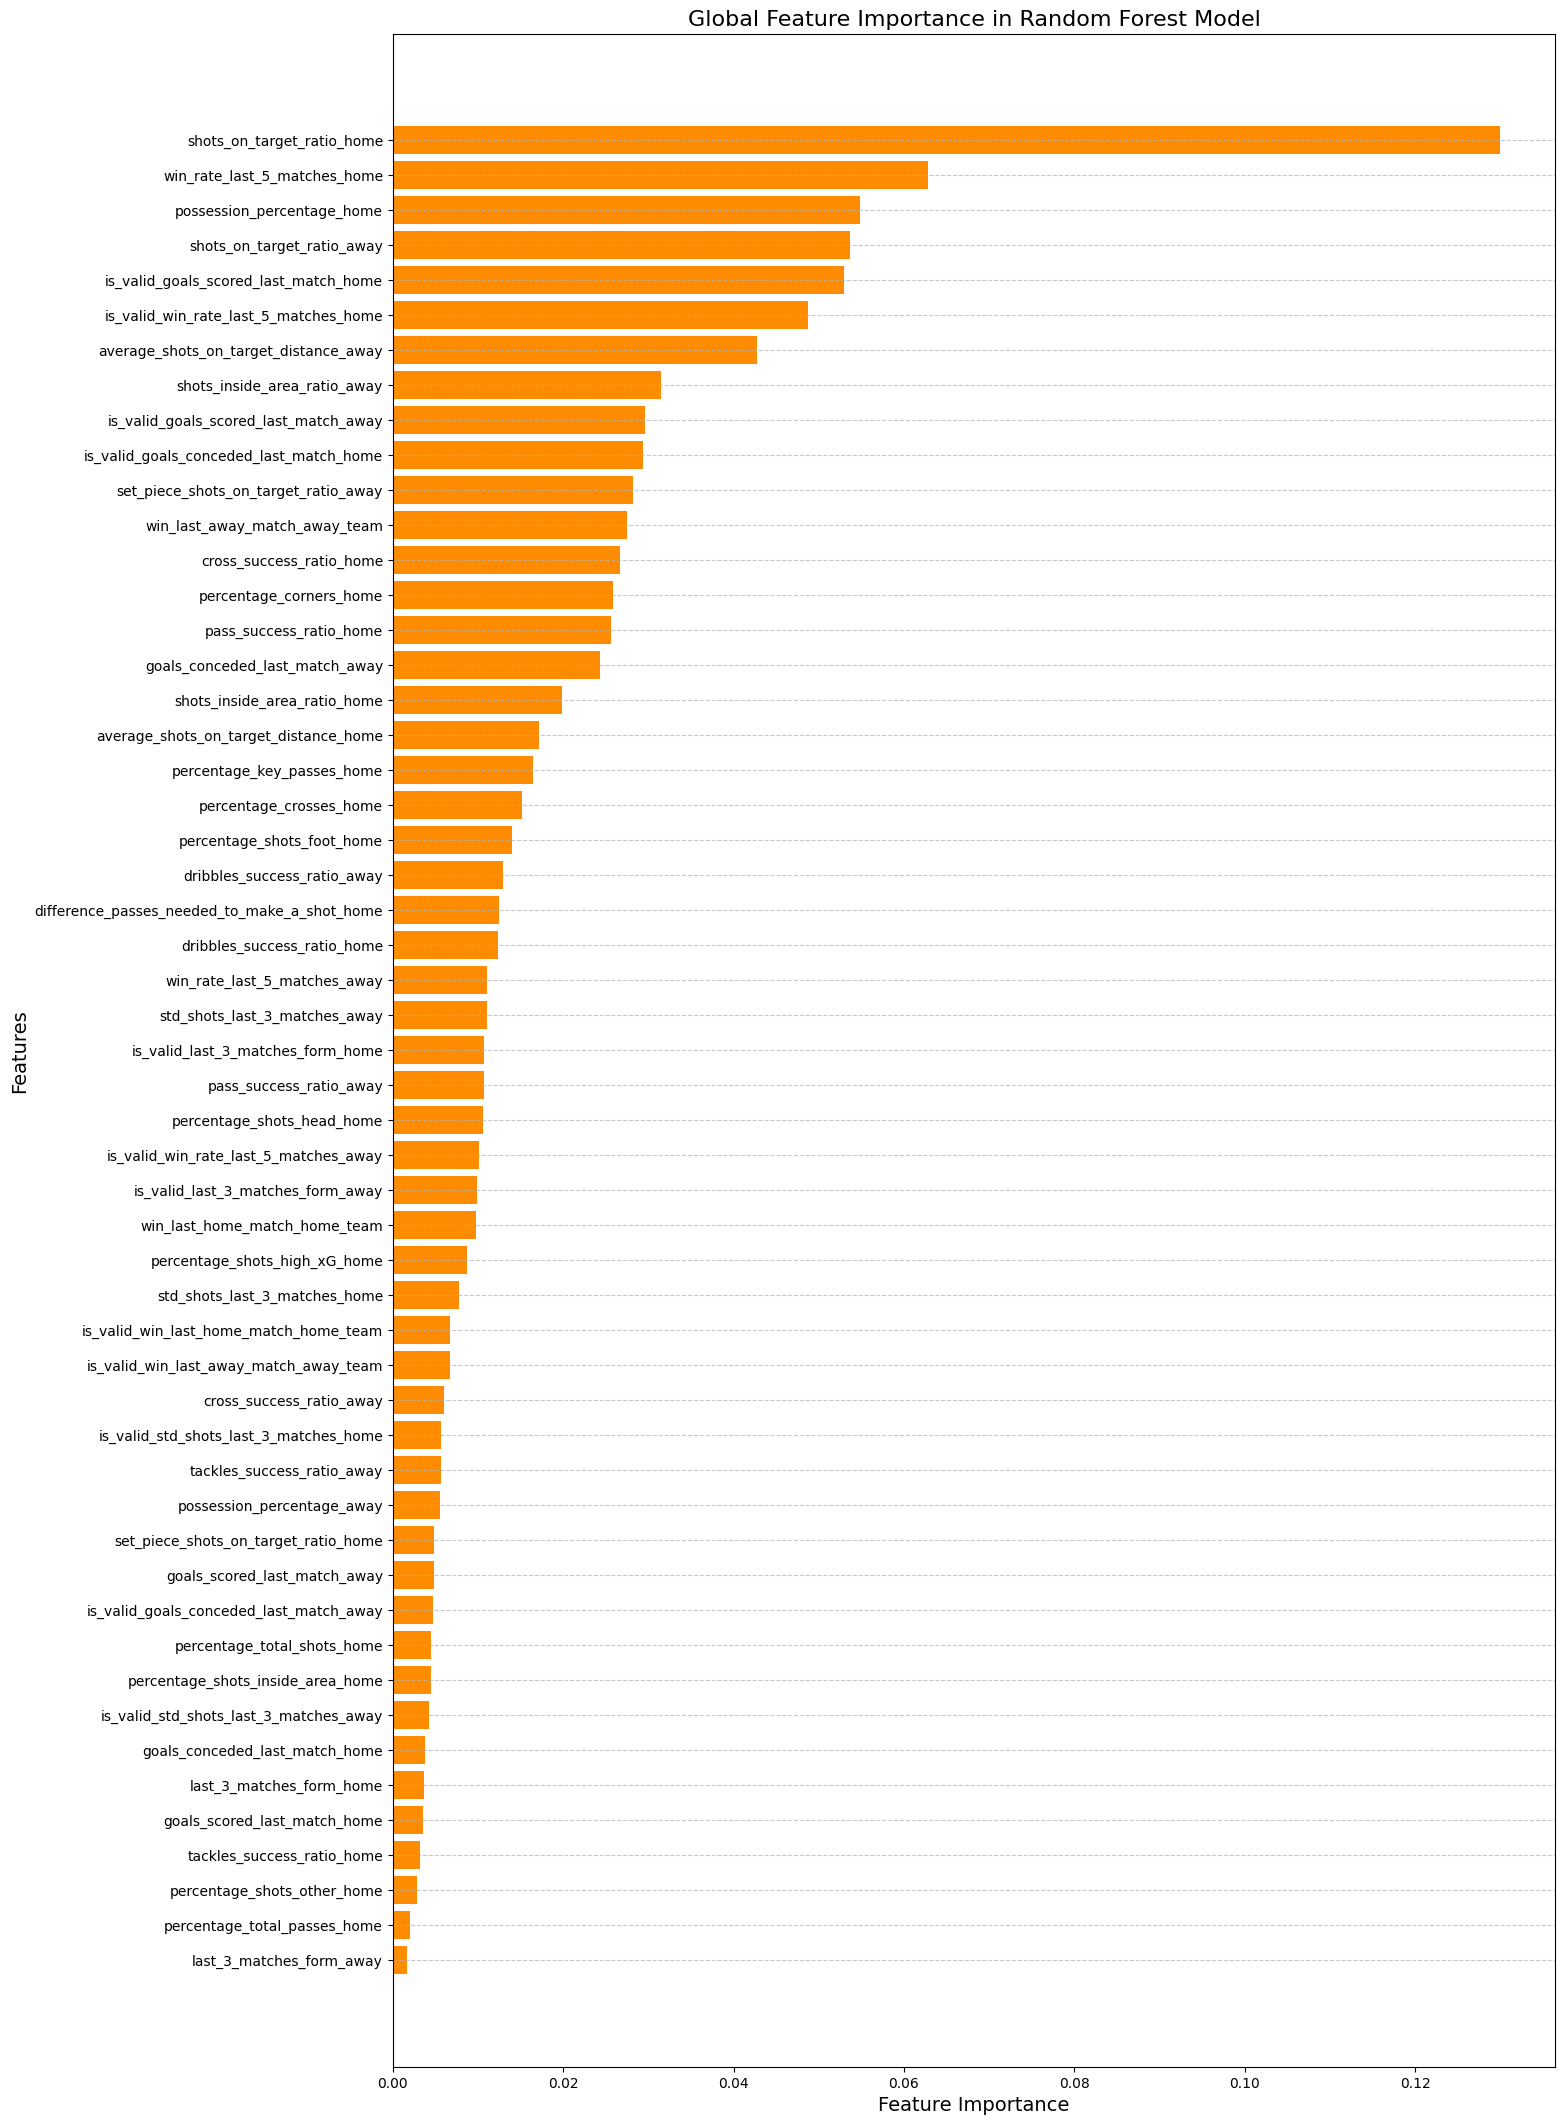

In [4]:
from src.analysis import random_forest_global_analysis

random_forest_global_analysis(best_model_Ligue1)

El modelo Random Forest ha determinado la relevancia de cada característica en la predicción del resultado de los partidos en la Ligue 1. A diferencia de la Regresión Logística, aquí se mide la importancia relativa de cada variable para el modelo en su conjunto, sin distinguir entre clases específicas (victoria local, empate o victoria visitante). Vamos a analizar el gráfico:

- **Caracterísiticas más importantes en la predicción**: Las características con mayor importancia en el modelo son aquellas que han tenido un impacto significativo en la clasificación del resultado del partido. Aunque no podemos determinar si una variable favorece a un equipo u otro, sí podemos intuir que estas características han sido relevantes en la toma de decisiones del modelo.
    - `shots_on_target_ratio_home`: El porcentaje de tiros a puerta del equipo local es la variable más influyente en el modelo. Esto sugiere que la precisión en los disparos es un aspecto clave para el resultado final del partido.
    - `win_rate_last_5_matches_home`: El rendimiento reciente del equipo local ha sido identificado como un factor relevante. Esto indica que los resultados obtenidos en los últimos encuentros han tenido una relación con el desenlace de los partidos en la competición.
    - `possession_percentage_away`: El porcentaje de posesión del equipo visitante ha sido una de las métricas con más peso. Aunque no podemos afirmar si más posesión se traduce en mejores resultados, sí podemos intuir que el control del balón está vinculado a ciertos patrones que el modelo ha identificado como influyentes.
    - `shots_on_target_ratio_away`: Al igual que ocurre con el equipo local, el porcentaje de tiros a puerta del equipo visitante es una característica importante. Esto refuerza la idea de que la generación de oportunidades y la precisión en los disparos tienen un papel determinante en el resultado del partido.
    - `is_valid_goals_scored_last_match_home`, `is_valid_goals_scored_last_match_away` y `is_valid_goals_conceded_last_match_home`: La variable que indica si los goles anotados/encajados en el último partido de los equipos fueron válidos (si tienen un significado válido porque ha habido un partido anterior de ese equipo) también ha sido considerada importante. Esto sugiere que el modelo ha encontrado una relación entre el desempeño ofensivo reciente, el desempeño defensivo reciente y los resultados de los partidos analizados.
    - `is_valid_win_rate_last_5_matches_home`: La varibale que indica si se pueden considerar el porcentaje de victoria del equipo local en los últimos cinco partidos se considera como importante. Esto sugiere que la forma en la que llega el equipo local tiene importancia en el resultado.
    - `average_shots_on_target_distance_away` y `average_shots_on_target_distance_home`: La distancia media de los tiros a puerta del equipo visitante y local cobran también importancia en la predicción del resultado del partido.
    - `shots_inside_area_ratio_away` y `shots_inside_area_ratio_home`: La frecuencia con la que los equipos logran disparar dentro del área también es una métrica con un peso relevante. Dado que los tiros dentro del área suelen tener una mayor probabilidad de acabar en gol, su importancia dentro del modelo es comprensible.
    - `set_piece_shots_on_target_ratio_away`: La precisión en jugadas a balón parado del equipo visitante también ha sido destacada por el modelo. Esto podría indicar que las acciones de estrategia como córners o tiros libres han tenido un peso en la predicción de los partidos.
    - `win_last_away_match_away_team`: Que el equipo visitante haya ganado o no su último partido fuera de casa influye también en el resultado. Con esto podemos deducir que la forma en su último partido en el que se encuentra en la misma situación (juega también fuera de casa) influye en el resultado.
    - `cross_success_ratio_home`, `pass_success_ratio_home` y `percentage_key_passes_home`: La efectividad en los centros, pases y los pases clave del equipo local han sido consideradas métricas relevantes. Esto sugiere que la calidad en la generación de jugadas de ataque es un aspecto que el modelo ha relacionado con los resultados de los partidos.
    - `difference_passes_needed_to_make_a_shot`: El estilo de juego en el partido de los equipos va a influir en el resultado. Veremos más adelante si favorece más a la victoria los equipos verticales (necesitan menos pases para realizar disparos) o los equipo más conservadores y que le dan mucha relevancia al control del juego (necesitan más pases para realizar disparos).

- **Características sin importancia en la predicción**: El modelo ha determinado que varias características no aportan información relevante en la clasificación del resultado del partido. Esto no significa que estas variables no tengan influencia en el fútbol en la Ligue 1, sino que, dentro de los datos analizados, el modelo no ha encontrado una relación clara con los resultados.
    - **Factores relacionados con el rendimiento reciente**:  Variables como `last_3_matches_form_home`, `last_3_matches_form_away`, `win_last_home_match_home_team` y `win_last_away_match_away_team` no han sido consideradas relevantes. Esto sugiere que, aunque el rendimiento reciente pueda ser un indicador del estado de forma de un equipo, los resultados individuales más cercanos no han sido determinantes en la predicción del modelo.
    - **Estadísticas defensivas y disciplinares**: 
        - Curiosamente, métricas como `tackles_success_ratio_home`, `percentage_tackles_home` y `percentage_recoveries_defensive_third_home` no han tenido importancia en el modelo. Esto podría indicar que el rendimiento defensivo es más difícil de modelar en términos de predicción de resultados, ya que su impacto puede depender de múltiples factores externos.
        - Otras métricas descartadas incluyen las tarjetas rojas (`percentage_red_cards_home`), las faltas cometidas (`percentage_penaltys_committed_home`) y los errores clave (`percentage_key_errors_home`). Su falta de relevancia sugiere que, aunque estos eventos pueden influir en ciertos partidos individuales, no han mostrado un patrón consistente en los datos analizados.
    - **Métricas ofensivas**: Es curioso como métricas ofensivas tan importantes como `percentage_shots_high_xG_home` tengan una importancia tan reducida a la hora de predecir el resultado.
    - **Otros factores tácticos y de juego**: El modelo también ha descartado estadísticas como `percentage_counterattacks_home` y `percentage_substitutions_home`. Esto podría indicar que la cantidad de veces que un equipo realiza estas acciones no tiene una relación clara con el desenlace del partido, o que su impacto depende de otros factores no considerados en el modelo.

**Conclusiones generales**: 

El modelo de Random Forest ha identificado que las métricas más relevantes para predecir el resultado de los partidos en la Ligue 1 están relacionadas con la eficiencia ofensiva y la generación de oportunidades de gol. Factores como la precisión en los tiros a puerta, la capacidad de generar disparos dentro del área y la posesión del balón han sido claves en la predicción del modelo.

Por otro lado, el modelo ha descartado métricas relacionadas con la defensa, la recuperación del balón y el rendimiento en los últimos partidos individuales, lo que sugiere que estos factores no han mostrado una relación clara con los resultados analizados. La falta de importancia de variables como los tackles, las recuperaciones y las tarjetas rojas indica que estos aspectos pueden no ser determinantes en la predicción del resultado final.

Es importante destacar que, aunque ciertas métricas han sido identificadas como más relevantes que otras, el modelo no nos indica en qué dirección afectan al resultado, solo que han sido utilizadas con mayor peso en la clasificación. Esto significa que, por ejemplo, una mayor posesión o un mayor número de tiros a puerta pueden estar correlacionados con el resultado, pero no podemos determinar si su aumento favorece a un equipo o simplemente es una característica común en los datos analizados.

En términos tácticos, podemos intuir que los equipos que logran generar oportunidades claras, tienen precisión en sus disparos y mantienen la posesión son los que tienen más probabilidades de obtener resultados favorables. Además, la importancia de las jugadas a balón parado sugiere que estas situaciones han jugado un papel clave en los desenlaces de los partidos.

En conclusión, la Ligue 1 parece estar influenciada en gran medida por el rendimiento ofensivo y la capacidad de generar ocasiones de gol. Aunque el modelo no nos dice exactamente cómo influyen estas características en cada partido, sí nos permite entender qué factores han sido más utilizados para la predicción del resultado. Esto aporta información valiosa para el análisis de los partidos del fútbol francés.

### Estudio local

Ahora comenzamos el análisis de explicabilidad utilizando SHAP. 

El análisis SHAP (SHapley Additive exPlanations) nos permite interpretar el impacto de cada característica en la predicción del modelo. A diferencia de los coeficientes lineales, SHAP captura interacciones entre variables y muestra el impacto individual de cada una en cada predicción. En este documento analizaremos los resultados obtenidos para la predicción de los partidos de la Ligue 1.

Cada uno de los siguientes gráficos representa la importancia de las variables en la predicción de cada posible resultado:
- Victoria del equipo visitante (away_team).
- Empate (draw).
- Victoria del equipo local (home_team).

**Interpretación de los gráficos SHAP**: Cada punto en el gráfico representa un partido. Los valores en el eje X indican el impacto de una característica específica en la predicción del modelo:
- Valores positivos: Incrementan la probabilidad de que el partido termine con el resultado indicado.
- Valores negativos: Disminuyen la probabilidad del resultado.
- Color: Representa el valor de la característica. Rojo indica valores altos y azul valores bajos.

In [5]:
from src.analysis import compute_shap_values

feature_names_Ligue1 = list(best_model_Ligue1.feature_names_in_)
shap_values_Ligue1 = compute_shap_values(best_model_Ligue1, X_train_Ligue1, X_test_Ligue1, feature_names_Ligue1)

Class 0: away_team
Important features (35):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_home', 'cross_success_ratio_away', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'goals_scored_last_match_home', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_total_passes_home', 'percentage_key_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_crosses_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_clearance_home', 'percentage_yellow_cards_home', 'percentage_red_cards_home', 'percentage_counterpress_home', 'percentage_dispossessed_home', 'p

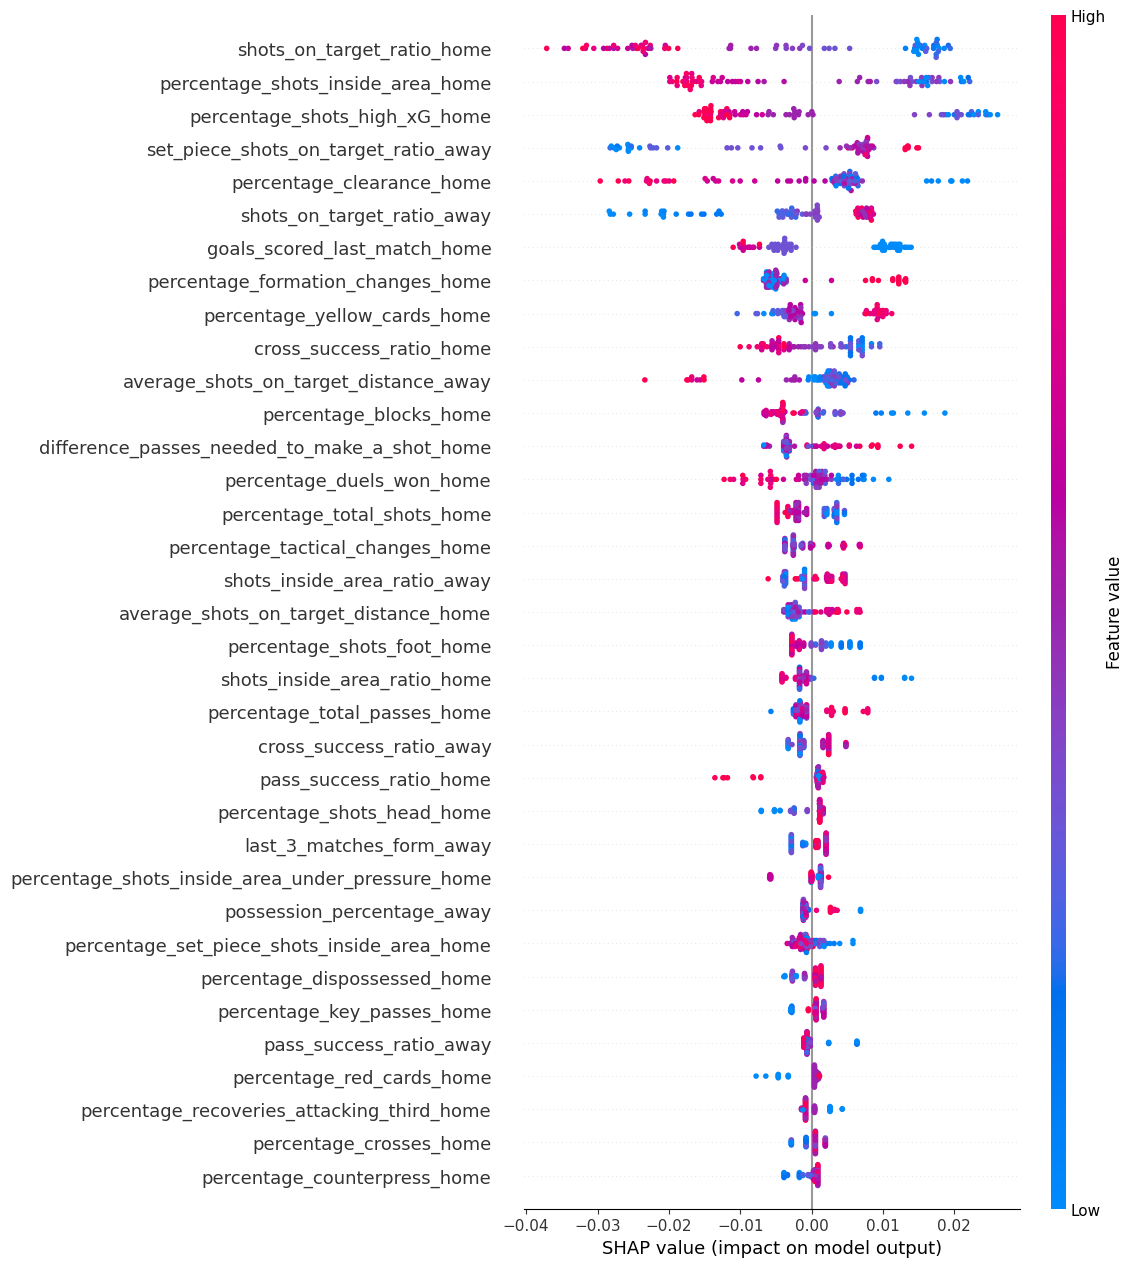

Class 1: draw
Important features (31):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_home', 'cross_success_ratio_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'win_rate_last_5_matches_home', 'goals_scored_last_match_home', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_head_home', 'percentage_total_passes_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_clearance_home', 'percentage_yellow_cards_home', 'percentage_pressures_home', 'percentage_counterpress_home', 'percentage_dribbles_home', 'percentage_recoveries_attacking_third_home', 'percentage_passes_under_pressure_home', 'percentage_set_piece_shots_inside_area_home', 'percentage_tactical_substitutions_home

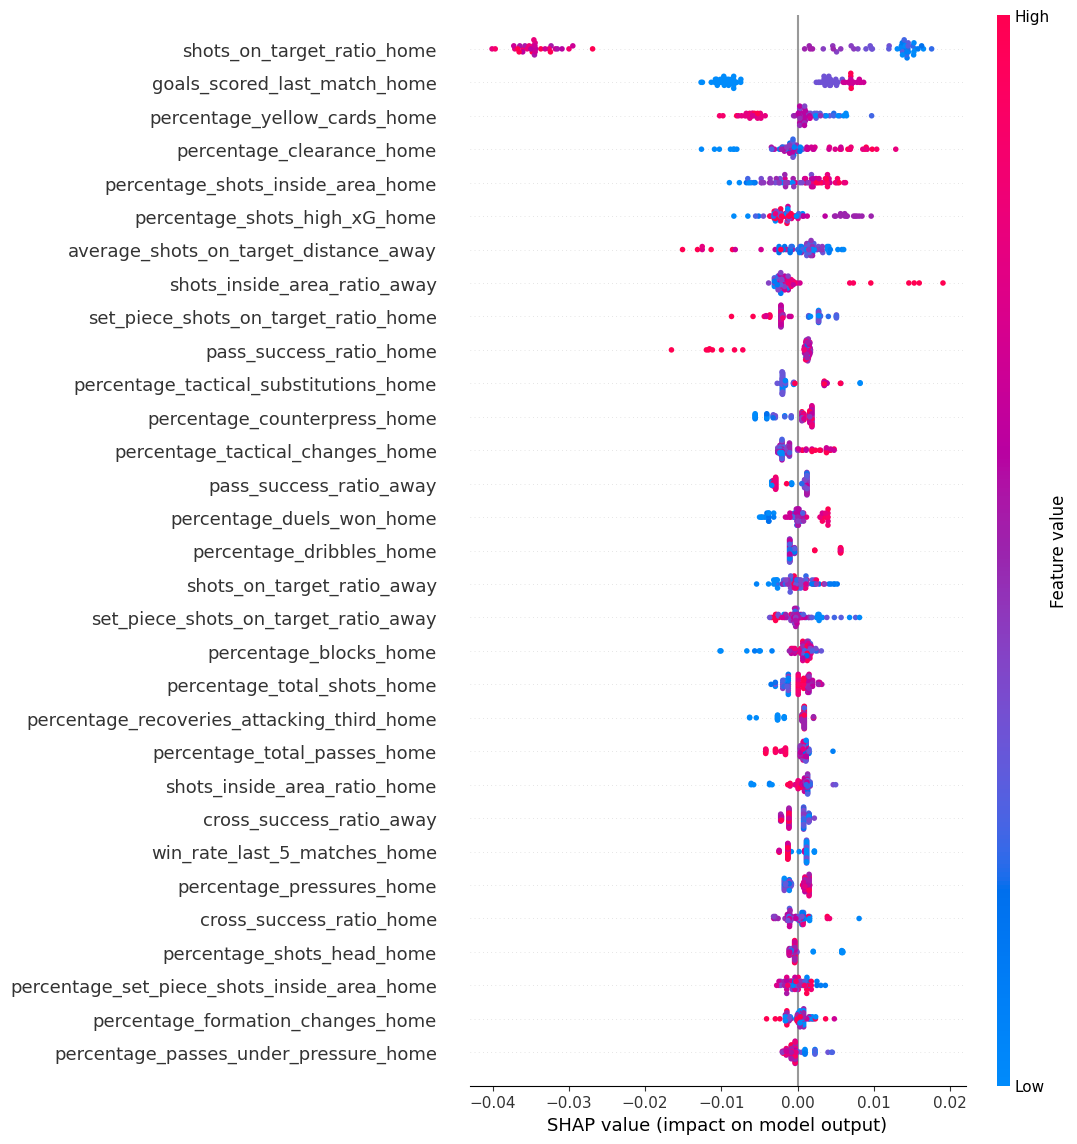

Class 2: home_team
Important features (38):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_home', 'cross_success_ratio_away', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'win_rate_last_5_matches_home', 'goals_scored_last_match_home', 'std_shots_last_3_matches_home', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_clearance_home', 'percentage_yellow_cards_home', 'percentage_red_cards_home', 'percentage_pressures_home', 'percentage_counterpr

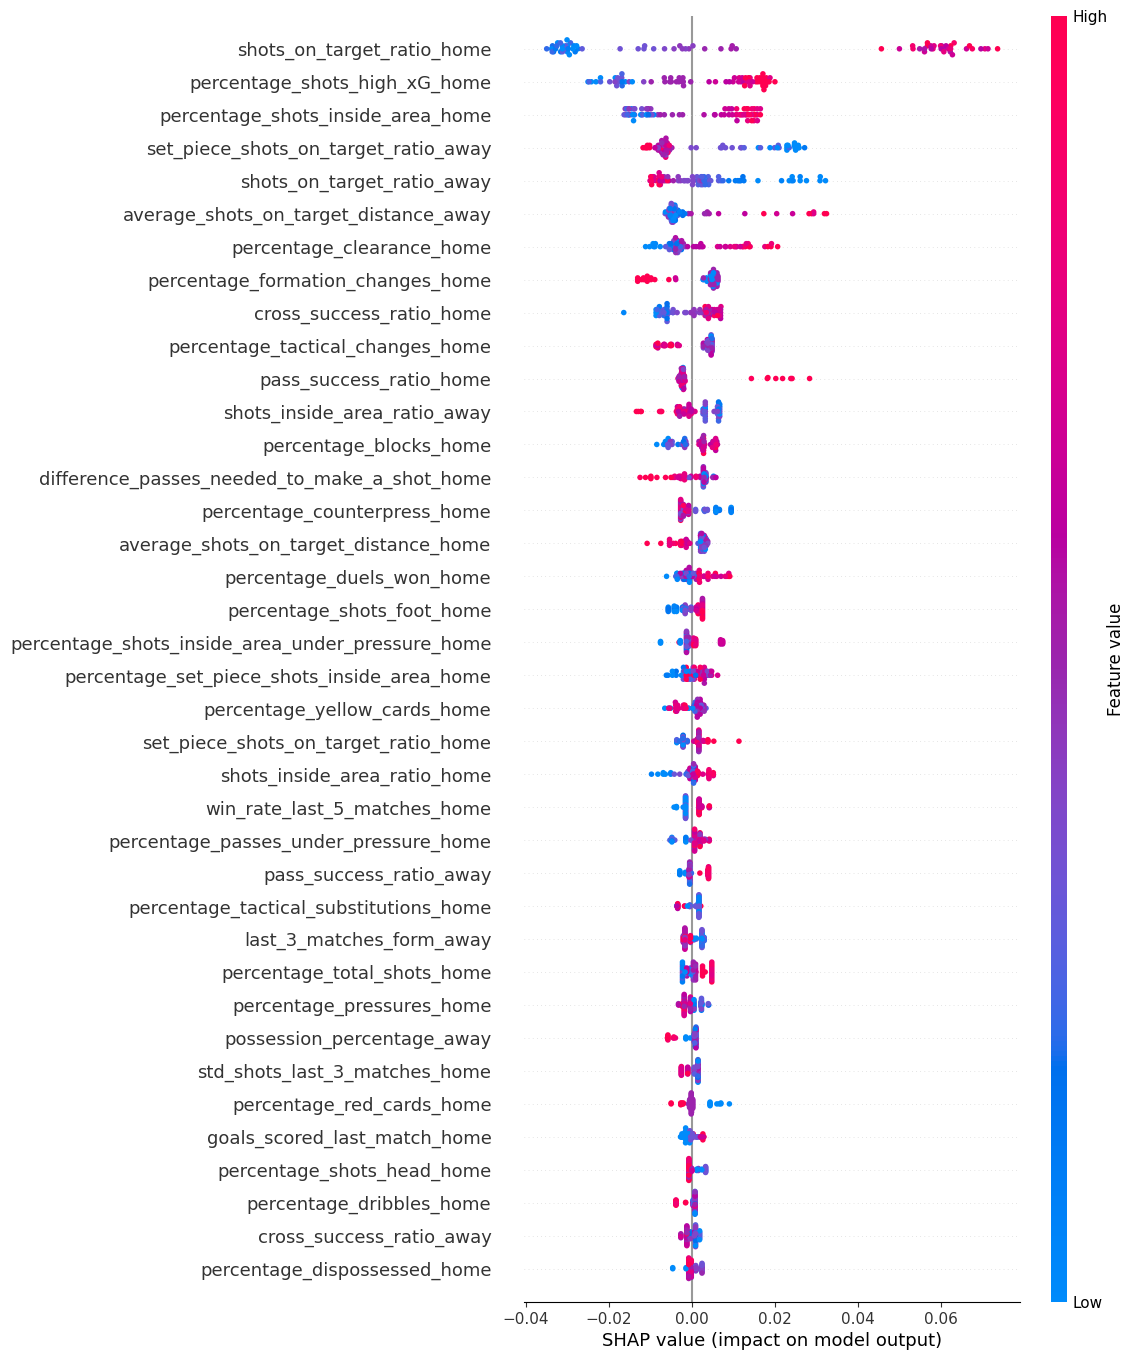

In [6]:
from src.analysis import plot_shap_summary

plot_shap_summary(shap_values_Ligue1, feature_names_Ligue1, encoder_Ligue1, threshold=0.001)

Vamos a analizar cada uno de los gráficos:

- **Victoria del equipo visitante**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de victoria del equipo visitante en la Ligue 1.
    - **Características que favorecen la victoria del equipo visitante**: 📈
        - `shots_on_target_ratio_away`: Un equipo visitante con un alto porcentaje de tiros a puerta es más eficiente en ataque, lo que aumenta sus probabilidades de marcar y ganar el partido.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante tiene precisión en jugadas a balón parado, puede aprovechar estas oportunidades para anotar goles clave.
        - `percentage_formation_changes_home`: Si el equipo local hace más cambios de formación que el equipo visitante eso significa que el equipo local esta viéndose superado lo que indica que el equipo visitante tiene más opciones de llavarse el partido.
        - `percentage_yellow_cards_home`: Si el equipo local recibe más tarjetas amarillas que el equipo visitante, eso significa que tiene más opciones de recibir una tarjeta roja y que deben andarse con más cuidado.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita más pases que el equipo visitante para realizar un tiro significa que el juego del equipo visitante es un juego más directo y efectivo lo que parece favorecer al equipo visitante.
        - `percentage_tactical_changes_home`: Un equipo local que necesita hacer muchos cambios tácticos puede estar teniendo dificultades en el partido, lo que favorece al equipo visitante.
        - `shots_inside_area_ratio_away`: Si un alto porcentaje de los tiros que ha hecho el equipo visitante han sido desde dentro del área aumentan las opciones de que gane el equipo visitante ya que son tiros normalmente más peligrosos.
        - `average_shots_on_target_distance_home`: Si el equipo local realiza tiros desde distancias más lejanas, disminuye la calidad de sus ocasiones y su posibilidad de marcar, lo que hace que aumenten las opciones de que el equipo visitante gane el partido.
        - `percentage_dispossessed_home`: Un equipo local que pierde el balón con frecuencia facilita oportunidades de contraataque para el equipo visitante.
    - **Características que no favorecen la victoria del equipo visitante**: 📉
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera peligro y reduce las posibilidades de que el equipo visitante gane.
        - `percentage_shots_inside_area_home`: Un equipo local que dispara mucho desde dentro del área genera más peligro y puede hacer más difícil la victoria visitante.
        - `percentage_shots_high_xG_home`: Un equipo local que genera disparos con alta expectativa de gol (xG) es más probable que convierta sus oportunidades, dificultando la victoria visitante.
        - `percentage_clearance_home`: Un equipo local con más despejes en el partido que el equipo visitante puede reflejar que el equipo local se esta defendiendo bien lo que hace difícil la victoria del equipo visitante.
        - `goals_scored_last_match_home`: Si el equipo local viene de anotar varios goles en su último partido, puede llegar con confianza y efectividad, complicando el triunfo visitante.
        - `cross_success_ratio_home`: Un equipo local con un alto porcentaje de precisión en centros puede hacer ver que están creando ocasiones de gol lo que hace que disminuyan las opciones del equipo visitante de ganar el partido.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, está reduciendo la efectividad ofensiva del equipo visitante y dificultando sus opciones de anotar.
        - `percentage_duels_won_home`: Si el equipo local gana más duelos que el equipo visitante esto puede significar que están siendo más intensos en el aspecto físico del partido.
        - `percentage_total_shots_home`: Si el equipo local realiza más tiros que el equipo visitante, aumentan sus opciones de ganar el partido por el simple hecho de haber intentado marcar más veces.
        - `shots_inside_area_ratio_home_`: Si un alto porcentaje de los tiros que ha hecho el equipo local han sido desde dentro del área aumentan las opciones de que gane el equipo local ya que son tiros normalmente más peligrosos.
    - **Conclusión**: La victoria del equipo visitante en la Ligue 1 está determinada por su efectividad en ataque, la capacidad de aprovechar los errores del equipo local y su superioridad táctica. Factores clave como un alto porcentaje de tiros a puerta, la precisión en jugadas a balón parado y la generación de tiros dentro del área aumentan sus probabilidades de éxito. Además, un equipo visitante que juega de manera más directa y efectiva, con menos necesidad de pases para generar un disparo, tiene más opciones de imponerse en el partido. Por otro lado, si el equipo local tiene una alta efectividad en sus tiros, genera ocasiones con alta expectativa de gol (xG) y domina en duelos físicos, la victoria visitante se vuelve más complicada. Asimismo, un equipo local que bloquea tiros, despeja bien y mantiene un alto porcentaje de precisión en centros puede reducir significativamente las opciones de que el visitante se lleve el partido.

- **Empate**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de empate en un partido en la Ligue 1. El empate en un partido se ve influenciado por el equilibrio entre ambos equipos en aspectos ofensivos, defensivos y de control del juego.
    - **Características que favorecen el empate**: 📈
        - `percentage_clearance_home`: Si el equipo local realiza muchos despejes en el partido puede indicar que ha sido complicado anotarle un gol, consiguiendo de esta manera que aumenten las opciones de que se de un empate.
        - `goals_scored_last_match_home`: Si el equipo local no ha anotado goles en su último partido puede indicar que viene en mala forma y que tiene complicado conseguir un empate, sin embargo, si viene de anotar algún tanto en el partido aunque sea sabemos que no viene en mala forma y que podría darse un empate.
        - `percentage_counterpress_home`: Un equipo local que presiona alto puede generar un partido trabado y con menos transiciones claras, favoreciendo un empate.
        - `percentage_tactical_changes_home`: Si el equipo local realiza cambios tácticos en un intento por controlar el partido sin volcarse al ataque, esto puede mantener el marcador parejo.
        - `percentage_duels_won_home`: Si el equipo local gana muchos duelos, el partido se vuelve más trabado y menos fluido, lo que favorece un marcador cerrado.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, está reduciendo la efectividad ofensiva del equipo visitante y dificultando sus opciones de anotar, lo que favorece a un marcador más cerrado.
        - `shots_inside_area_ratio_home` y `shots_inside_area_ratio_away`: Si ambos equipos generan tiros dentro del área sin convertir goles, el partido puede mantenerse igualado hasta el final.
    - **Características que no favorecen el empate**: 📉
        - `shots_on_target_ratio_home`: Si el equipo local tiene una alta precisión en sus tiros a puerta, aumenta la posibilidad de marcar y romper el empate.
        - `percentage_yellow_cards_home`: Si el equipo local recibe más tarjetas amarillas que el equipo visitante, eso significa que tiene más opciones de recibir una tarjeta roja y que deben andarse con más cuidado. Además puede ser sintoma de la frustración del equipo local tras estar viendose superado en el partido.
        - `percentage_shots_high_xG_home`: Si el equipo local genera oportunidades con alta expectativa de gol (xG), es más probable que convierta y rompa la igualdad.
        - `average_shots_on_target_distance_away`: Si la distancia media de los tiros del equipo visitante es una distancia elevada, hace que aumenten las probabilidades de que el gane el equipo local.
        - `cross_success_ratio_home` y `cross_success_ratio_away`: Si uno de los equipos tiene una alta precisión en los centros, puede generar más peligro y romper el equilibrio del partido.
        - `win_rate_last_5_matches_home`: Si el equipo local ha tenido un buen rendimiento en los últimos cinco partidos, es más probable que mantenga el impulso y consiga la victoria en lugar de empatar.
        - `percentage_passes_under_pressure_home`: Si el equipo local logra completar pases bajo presión, puede controlar mejor el partido y generar más oportunidades de gol.
    - **Conclusión**: El empate en la Ligue 1 suele darse cuando ningún equipo logra imponerse con claridad y el partido se mantiene equilibrado en términos de posesión, duelos físicos y oportunidades de gol. Factores como la solidez defensiva del equipo local, el éxito en la presión alta y la cantidad de tiros bloqueados contribuyen a que el marcador se mantenga parejo a lo largo del partido. Sin embargo, el empate se vuelve menos probable cuando uno de los equipos genera más oportunidades claras (xG), tiene una alta precisión en sus tiros a puerta y domina en aspectos clave como los centros efectivos y los pases bajo presión. Además, un equipo local que viene con una buena racha en los últimos cinco partidos es más propenso a conseguir una victoria en lugar de empatar.

- **Victoria del equipo local**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de victoria del equipo local en la Ligue 1.
    - **Características que favorecen la victoria del equipo local**: 📈
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera más peligro y aumenta sus posibilidades de marcar y ganar el partido.
        - `percentage_shots_high_xG_home`: Si los tiros del equipo local tienen un alto expected goals (xG), son más peligrosos y pueden traducirse en goles con mayor frecuencia.
        - `percentage_shots_inside_area_home`: Un equipo local que genera muchos tiros dentro del área tiene más probabilidades de marcar, ya que estos disparos suelen ser más efectivos.
        - `average_shots_on_target_distance_away`: Si la distancia media de los tiros del equipo visitante es una distancia elevada, hace que aumenten las probabilidades de que el gane el equipo local.
        - `percentage_clearance_home`: Una defensa efectiva que despeja los balones con éxito reduce las oportunidades de gol del equipo visitante y ayuda a mantener la ventaja en el marcador.
        - `cross_success_ratio_home`: Si el equipo local tiene una alta precisión en los centros, puede generar más peligro y romper el equilibrio del partido.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, significa quue esta defendiendo bien.
        - `percentage_duels_won_home`: Ganar más duelos en el partido permite al equipo local imponerse físicamente y recuperar la posesión en zonas clave.
        - `percentage_shots_foot_home`: Un alto número de disparos con el pie indica que el equipo local está generando oportunidades más claras en comparación con tiros de cabeza, lo que aumenta la probabilidad de marcar.
        - `set_piece_shots_on_target_ratio_home`: Si el equipo local es preciso en jugadas a balón parado, puede aprovechar estas oportunidades para anotar y aumentar sus posibilidades de victoria.
        - `win_rate_last_5_matches_home`: Un equipo local con una buena racha en los últimos cinco partidos llega en un estado de forma óptimo, aumentando sus probabilidades de ganar.
        - `shots_inside_area_ratio_home`: Si un alto porcentaje de los tiros que ha hecho el equipo local han sido desde dentro del área aumentan las opciones de que gane el equipo local ya que son tiros normalmente más peligrosos.
        - `percentage_shots_inside_area_under_pressure_home`: Si el equipo local consigue finalizar jugadas dentro del área a pesar de la presión defensiva, tiene más probabilidades de convertir y ganar el partido.
    - **Características que no favorecen la victoria del equipo local**: 📉
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante es preciso en jugadas a balón parado, puede generar peligro y reducir las posibilidades de victoria del equipo local.
        - `shots_on_target_ratio_away`: Si el equipo visitante tiene un alto porcentaje de tiros a puerta, puede generar más peligro y reducir las opciones de victoria del equipo local.
        - `percentage_formation_changes_home` y `percentage_tactical_changes_home`: Si el equipo local realiza demasiados cambios de formación o tácticos, podría indicar falta de estabilidad táctica, lo que puede ser un factor negativo para su rendimiento.
        - `shots_inside_area_ratio_away`: Si un alto porcentaje de los tiros que ha hecho el equipo visitante han sido desde dentro del área aumentan las opciones de que gane el equipo visitante ya que son tiros normalmente más peligrosos.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita más pases que el equipo visitante para realizar un tiro significa que el juego del equipo visitante es un juego más directo y efectivo lo que parece favorecer al equipo visitante.
        - `average_shots_on_target_distance_home`: Si la distancia media de los tiros del equipo visitante es una distancia elevada, hace que aumenten las probabilidades de que el gane el equipo local.
        - `percentage_red_cards_home`: Un equipo local que recibe tarjetas rojas podría quedarse con menos jugadores, debilitando su estructura defensiva y complicando sus opciones de victoria.
    - **Conclusión**: La victoria del equipo local en la Ligue 1 está influenciada principalmente por su efectividad ofensiva, solidez defensiva y control del partido. Un equipo que genera muchas oportunidades de gol dentro del área, mantiene una alta precisión en los tiros a puerta y domina en los duelos físicos tiene mayores probabilidades de imponerse en el marcador. Además, su capacidad para ejecutar jugadas a balón parado con precisión, realizar despejes efectivos y bloquear tiros rivales refuerza su solidez y dificulta el ataque del equipo visitante. Por otro lado, la victoria local se complica si el equipo visitante logra generar tiros peligrosos desde dentro del área, tiene una alta precisión en jugadas a balón parado y muestra un estilo de juego más directo y efectivo. Además, factores como la falta de estabilidad táctica, la acumulación de tarjetas rojas y la dependencia de tiros desde larga distancia pueden debilitar al equipo local y darle ventaja al equipo visitante.

- **Conclusiones generales**:
    - *Victoria del equipo visitante*: La victoria del equipo visitante en la Ligue 1 se ve favorecida cuando el equipo logra ser efectivo en ataque, tiene un juego directo y aprovecha los errores del equipo local. Un alto porcentaje de tiros a puerta y precisión en jugadas a balón parado aumentan considerablemente sus posibilidades de éxito. Además, si el equipo local muestra inestabilidad táctica, con constantes cambios de formación o un juego poco efectivo que requiera muchos pases para generar oportunidades, el visitante se beneficia. Sin embargo, si el equipo local es sólido en defensa, con una alta efectividad en sus disparos y un dominio en los duelos físicos, la victoria del visitante se vuelve más complicada.
    - *Empate*: El empate en la Ligue 1 se produce cuando ambos equipos se neutralizan mutuamente en ataque y defensa, resultando en un partido cerrado. Equipos que destacan por su solidez defensiva, con muchos despejes y bloqueos de tiros, tienen más posibilidades de mantener el marcador parejo. Asimismo, una presión alta efectiva y una gran cantidad de duelos ganados pueden hacer que el partido sea trabado, sin un claro dominador. Sin embargo, el empate se vuelve menos probable cuando uno de los equipos es más preciso en sus tiros a puerta, genera oportunidades con alta expectativa de gol (xG) y domina en aspectos clave como los centros y los pases bajo presión. Un equipo con un buen rendimiento reciente también es menos propenso a conformarse con el empate y buscará la victoria.
    - *Victoria del equipo local*: La victoria del equipo local está determinada por su capacidad para generar peligro en el área rival, mantener una defensa sólida y controlar el ritmo del partido. Un alto porcentaje de tiros a puerta, la efectividad en jugadas a balón parado y la capacidad para ganar duelos físicos le dan al equipo local una ventaja significativa. Además, si el equipo visitante recurre a tiros lejanos o no tiene precisión en su ataque, el equipo local se favorece aún más. Sin embargo, la victoria local se complica si el equipo visitante tiene un alto porcentaje de tiros a puerta, es preciso en jugadas a balón parado y consigue generar peligro desde dentro del área. Factores como la inestabilidad táctica, la acumulación de tarjetas rojas o la dificultad del equipo local para mantener la posesión bajo presión también pueden reducir sus posibilidades de éxito.
    - *Factores no determinantes*: Algunos factores no parecen determinantes en el resultado de los partidos en la Ligue 1. Por ejemplo, el número total de pases realizados por un equipo no es un indicador claro de victoria, ya que la posesión por sí sola no garantiza generar oportunidades de gol efectivas. Asimismo, la cantidad de faltas cometidas no parece tener un impacto significativo a menos que resulten en tarjetas rojas o penaltis. Algunos cambios tácticos pueden reflejar problemas en el equipo, pero no siempre afectan directamente el resultado final. Además, aunque las estadísticas defensivas como despejes y bloqueos son importantes para mantener un marcador cerrado, por sí solas no determinan quién ganará el partido.

#### Gráficos de dependencias

Vamos a visualizar el impacto de las características más importantes en la predicción del modelo usando gráficos de dependencia SHAP.

Estos gráficos nos permiten analizar:
- Cómo una característica específica influye en la predicción del modelo.
- La relación entre el valor de una característica y su impacto en la probabilidad de un resultado.
- Cómo interactúan las características entre sí, identificando relaciones no lineales que afectan la predicción.

¿Cómo seleccionamos las características a analizar?: Para cada posible resultado del partido (victoria local, empate o victoria visitante):
1. Calculamos la importancia promedio de cada característica en función de los valores SHAP.
2. Seleccionamos las 12 características más influyentes en la predicción de cada clase.
3. Generamos gráficos de dependencia para ver cómo afectan a la probabilidad de cada resultado.

¿Cómo interpretar los gráficos SHAP?:
- Eje X: Valores de la característica en los datos originales (sin normalizar).
- Eje Y: Valores SHAP (impacto en la predicción del modelo).
- Colores: Representan otra característica que interactúa con la principal (seleccionada automáticamente por SHAP).

¿Qué podemos descubrir con estos gráficos?
- Si una característica tiene un gran impacto positivo en SHAP, significa que aumenta la probabilidad de ese resultado.
- Si una característica tiene un gran impacto negativo en SHAP, significa que disminuye la probabilidad de ese resultado.
- Si los puntos en el gráfico no siguen una línea recta, puede indicar que existe una interacción compleja entre las características.


Graphs for class: away_team



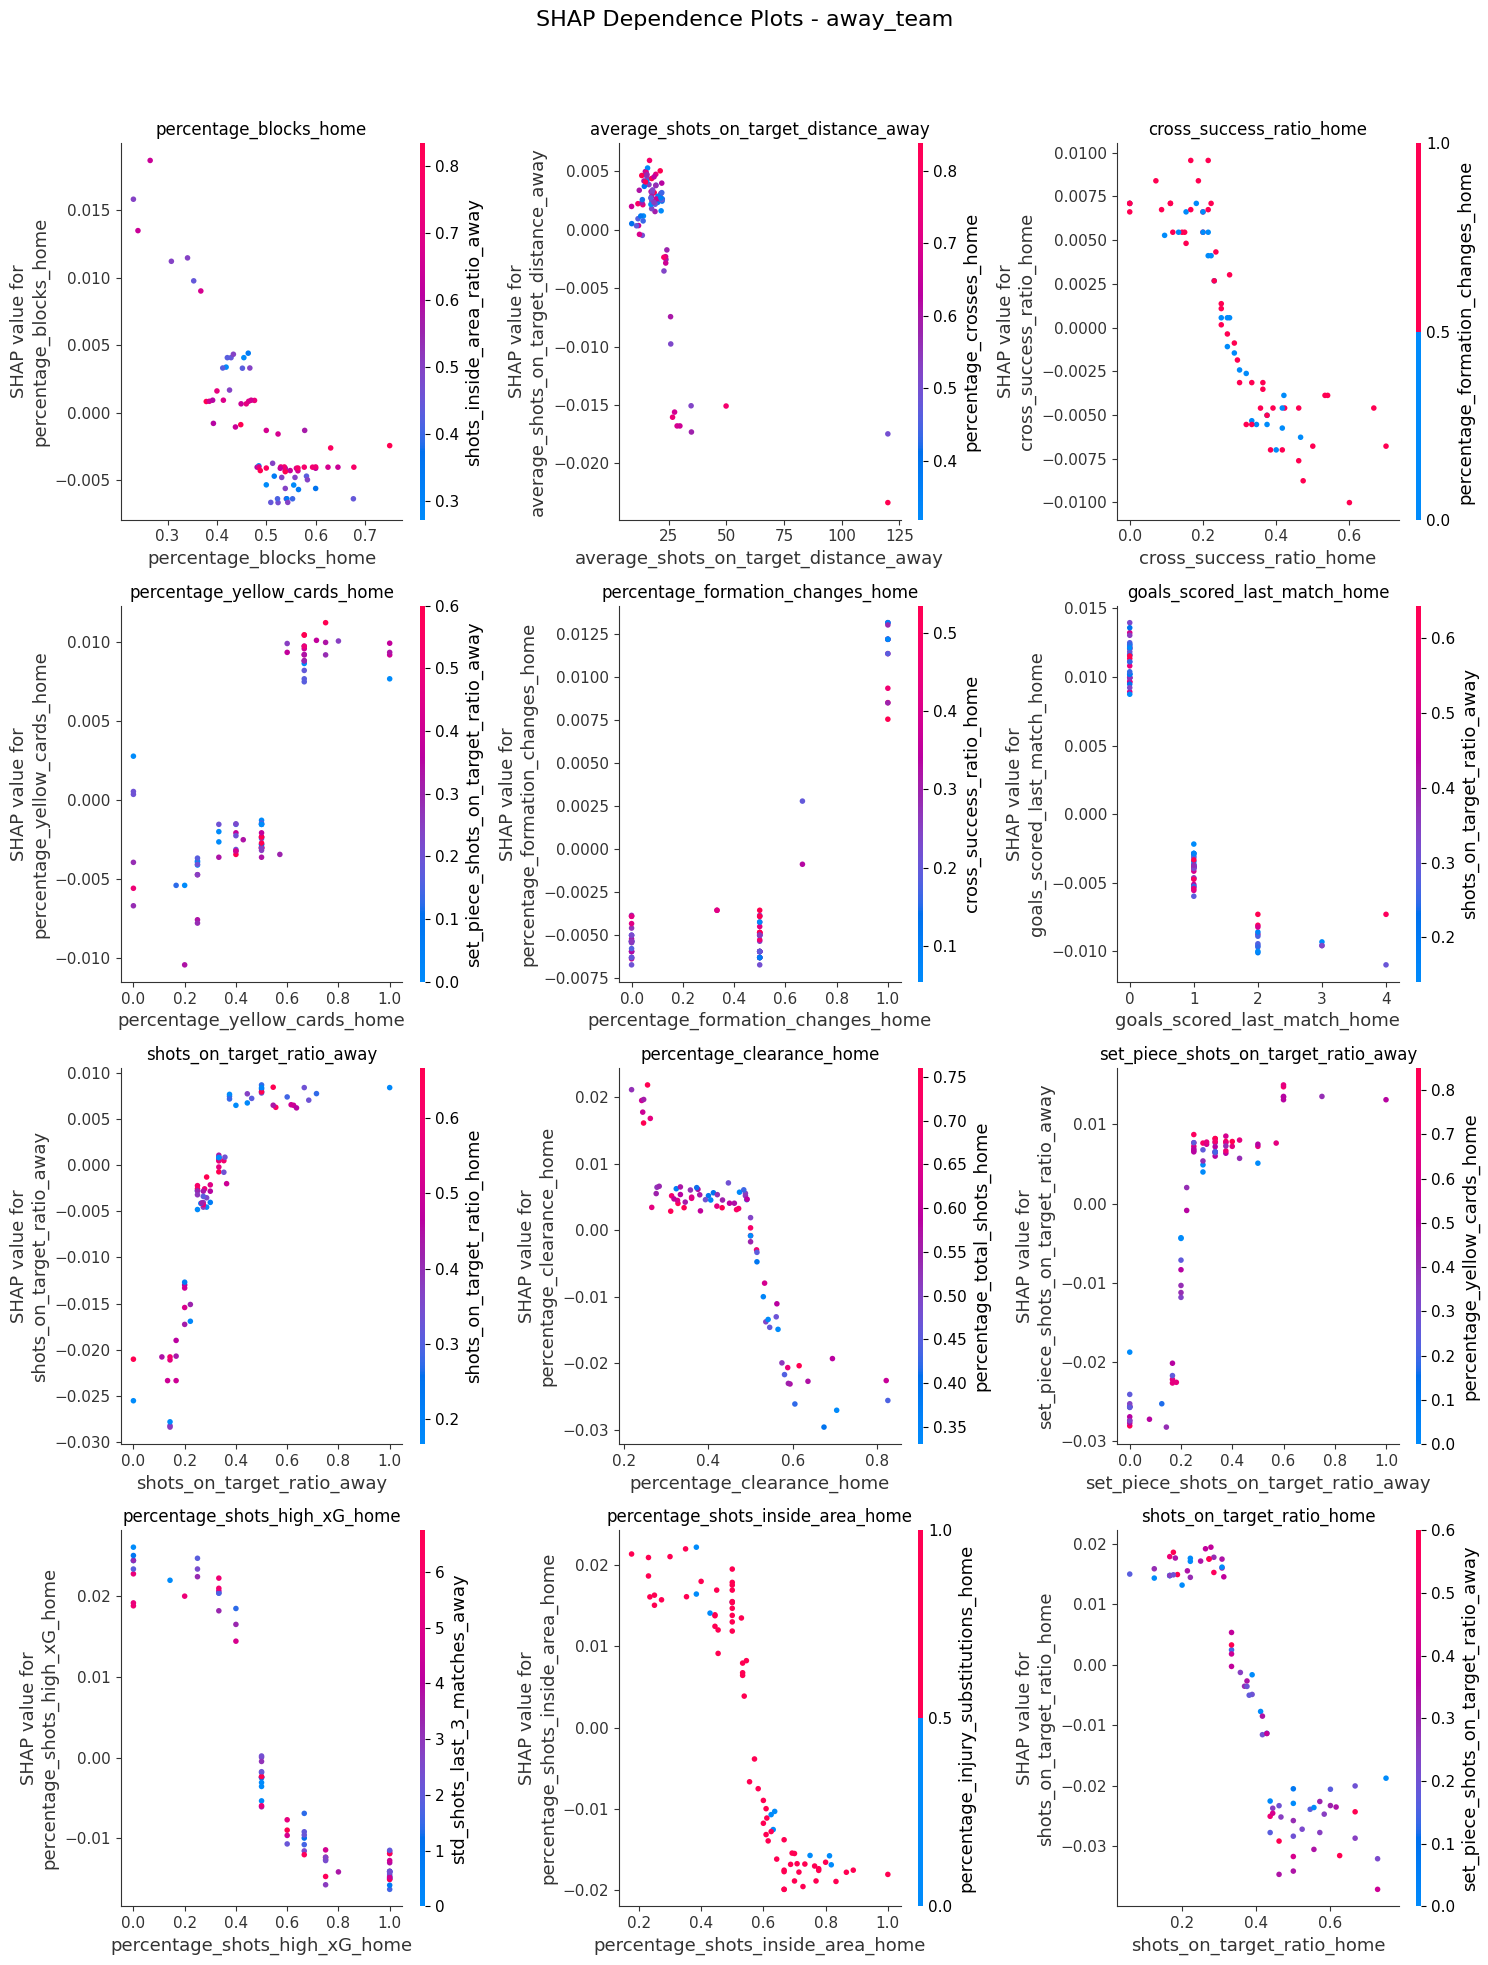


Graphs for class: draw



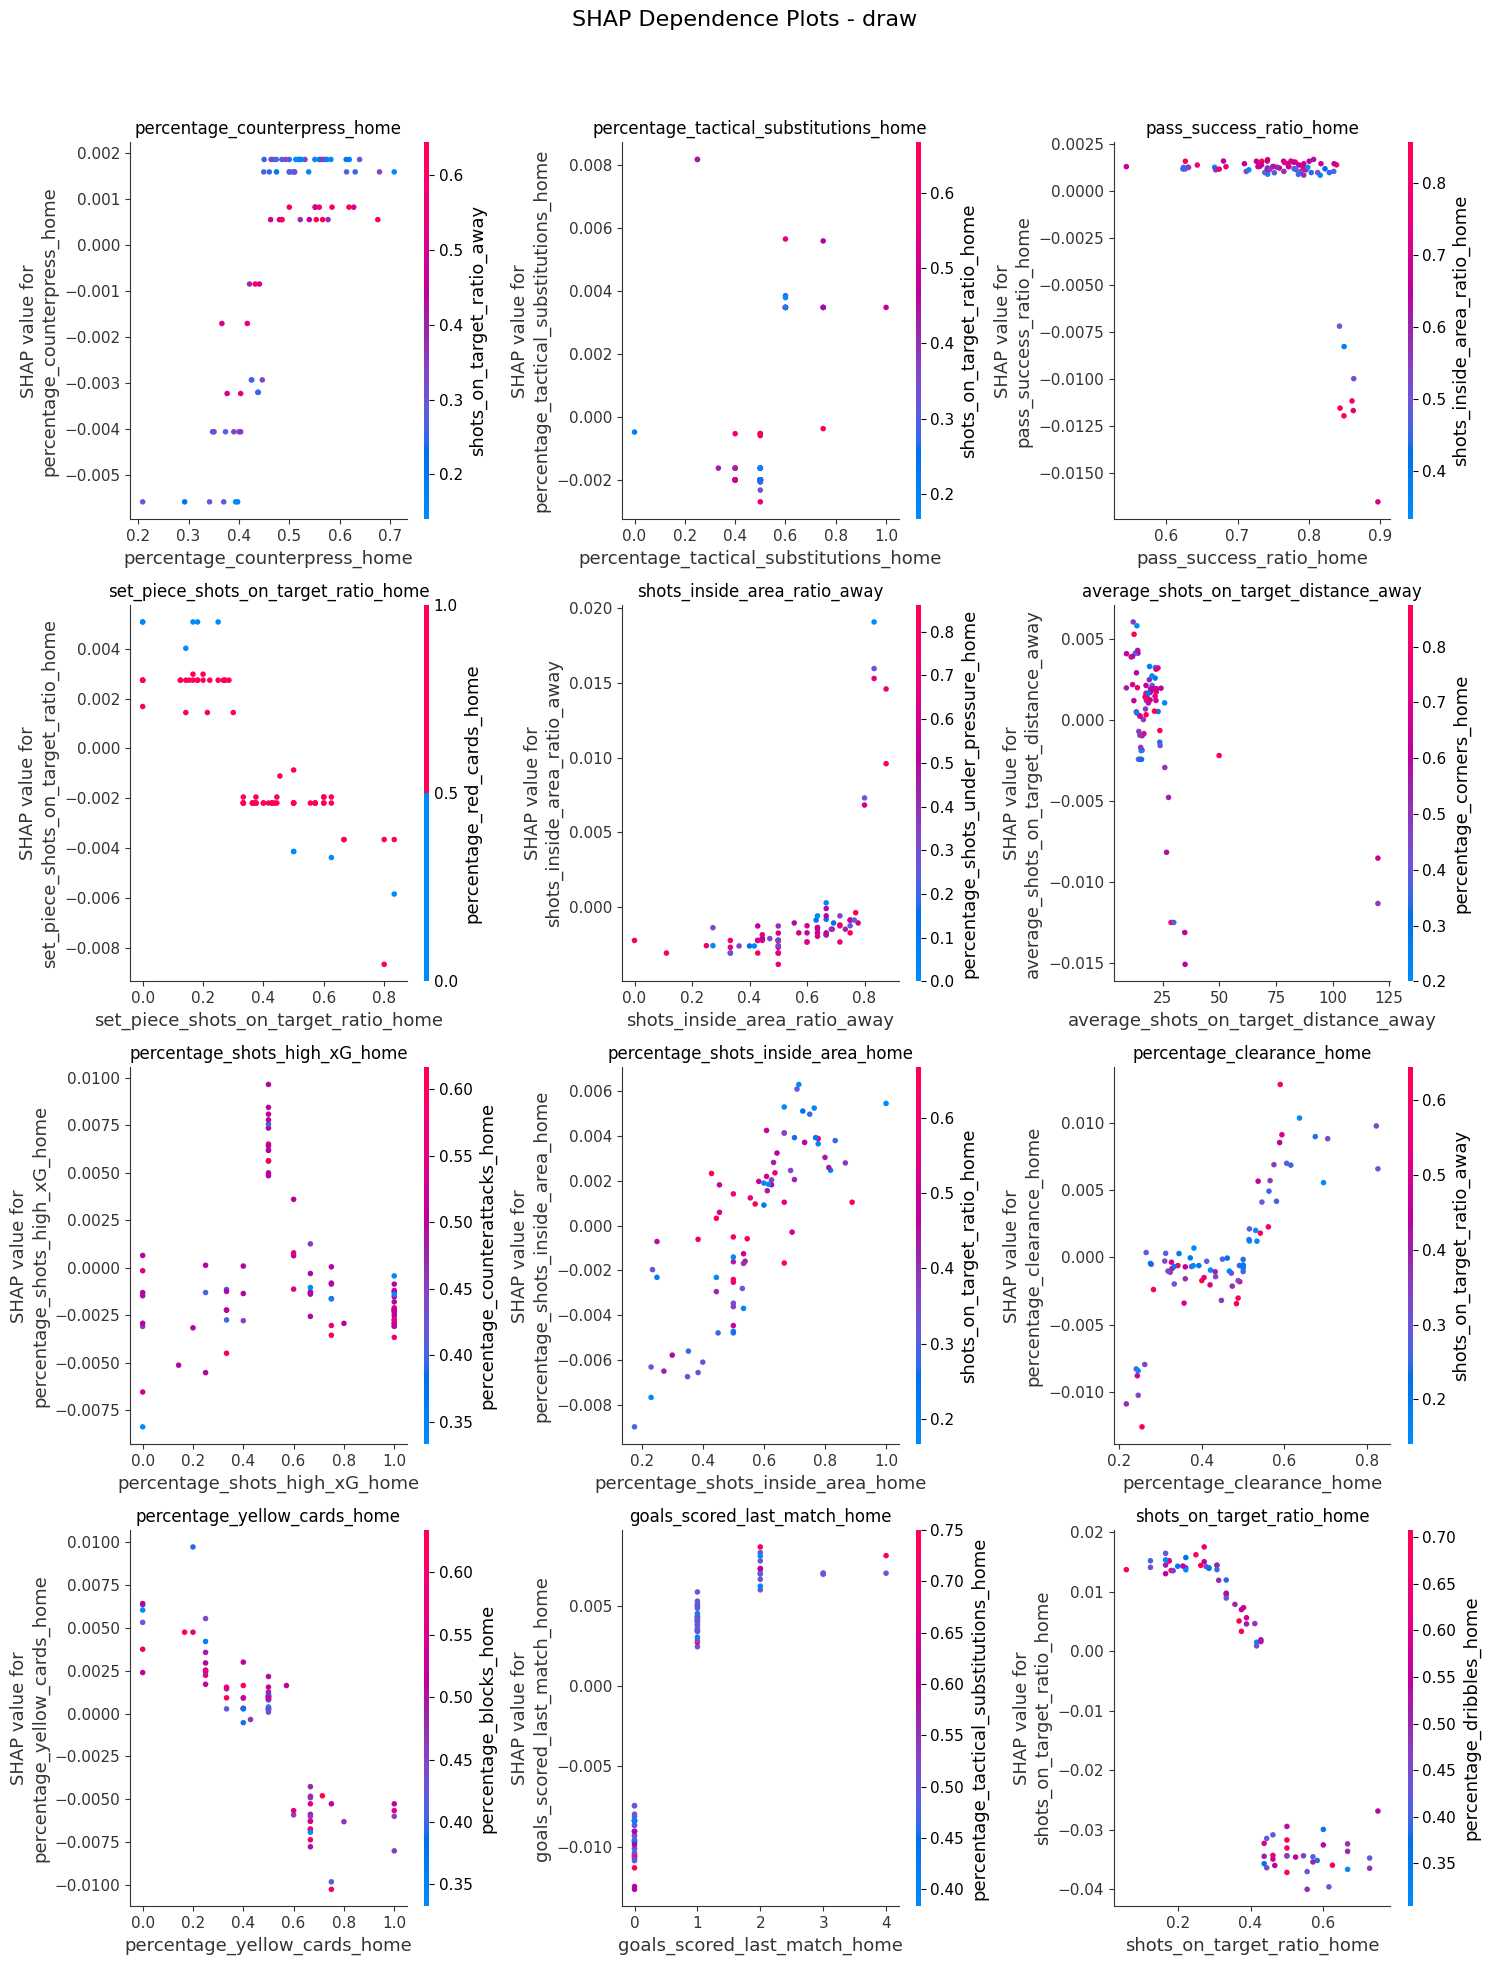


Graphs for class: home_team



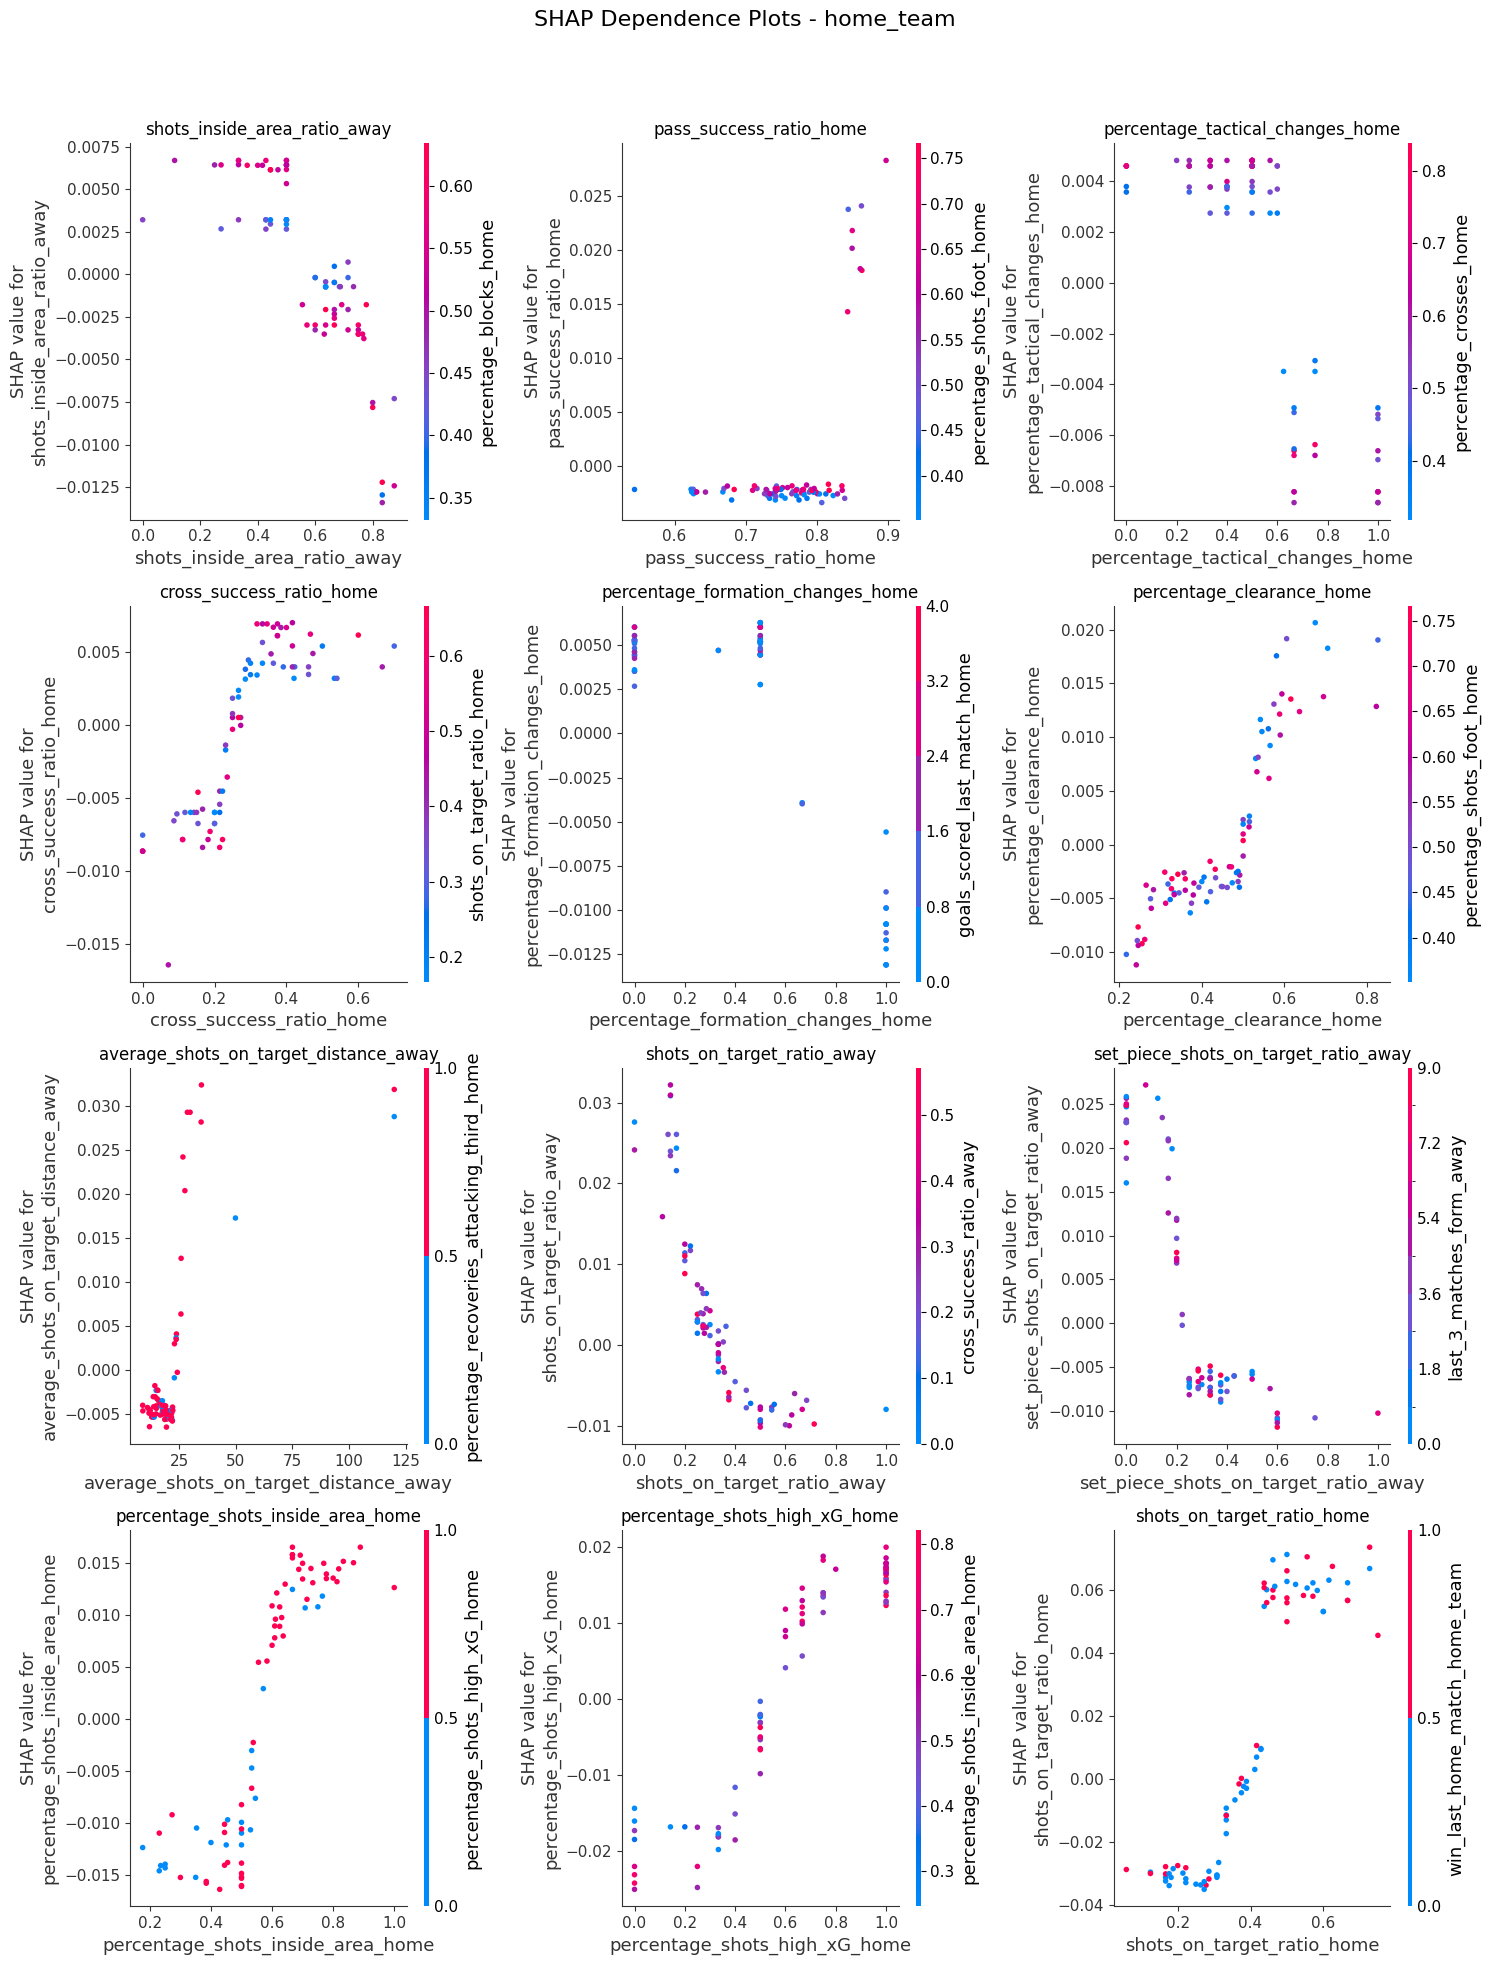

In [7]:
from src.analysis import plot_shap_dependence_plots

plot_shap_dependence_plots(shap_values_Ligue1, feature_names_Ligue1, X_test_Ligue1, encoder_Ligue1)

Vamos a ir analizando cada uno de los gráfico de dependencia que se han generado para cada clase:

- **Análisis de los gráficos de dependencia de SHAP para la victoria del equipo visitante:** En esta sección analizamos los SHAP Dependence Plots generados para la clase "away_team", es decir, la victoria del equipo visitante en la Ligue 1. Cada gráfico muestra la relación entre una característica y su valor SHAP, indicando cómo esta influye en la probabilidad de victoria del equipo visitante. Además, el color representa una segunda variable que puede interactuar con la característica principal.
    - **percentage_blocks_home**: Porcentaje de tiros bloqueados por el equipo local respecto al total del partido (ambos equipos).
        - Relación no lineal: Se observa que la relación no sigue un patrón totalmente lineal, pero en general, a medida que aumentan los bloqueos del equipo local, la probabilidad de victoria visitante disminuye. Esto sugiere que un equipo local que bloquea más tiros está reduciendo las oportunidades del visitante, pero en ciertos valores intermedios, el impacto en la victoria visitante parece menos claro.
        - La variable *shots_inside_area_ratio_away* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **average_shots_on_target_distance_away**: Distancia media de los tiros a puerta del equipo visitante.
        - Relación no completamente lineal: Para valores bajos (tiros cercanos a la portería), la probabilidad de victoria visitante es mayor. Sin embargo, conforme los tiros a puerta del visitante son desde más lejos, la relación con la victoria disminuye drásticamente. Esto sugiere que los tiros lejanos tienden a ser menos efectivos, pero hay ciertos casos donde la relación se mantiene estable, posiblemente debido a la calidad de los remates desde media distancia.
        - La variable *percentage_crosses_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **cross_success_ratio_home**: Porcentaje de centros exitosos del equipo local. 
        - A medida que aumenta el porcentaje de centros exitosos del equipo local, la probabilidad de victoria visitante tiende a disminuir, pero no de forma uniforme. En valores bajos y medios de éxito en los centros, la relación es menos clara, pero en niveles altos de precisión en centros, la victoria visitante se reduce notablemente.
        - La variable percentage_formation_changes_home (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **percentage_yellow_cards_home**: Porcentaje de tarjetas amarillas recibidas por el equipo local respecto al total del partido (ambos equipos).
        - Relación con tendencia creciente pero no lineal: A medida que el equipo local recibe más tarjetas amarillas, la probabilidad de victoria visitante aumenta, pero no de manera completamente uniforme. Se observan ciertos puntos en los que la relación se estabiliza o incluso disminuye ligeramente, lo que sugiere que no todas las amonestaciones afectan por igual.
        - La relación con *set_piece_shots_on_target_ratio_away* (color) muestra que, si el visitante es efectivo en jugadas a balón parado (puntos rojos), este impacto negativo del juego brusco del equipo local en su victoria se acentúa.
    - **percentage_formation_changes_home**: Porcentaje de cambios de formación del equipo local respecto al total del partido (ambos equipos). 
        - Relación no completamente lineal: Se observa que cuando el equipo local realiza pocos cambios tácticos, la probabilidad de victoria visitante es baja. Sin embargo, conforme aumentan los cambios de formación, la relación con la victoria visitante se incrementa, aunque con ciertos puntos donde el efecto se suaviza. Esto sugiere que realizar cambios tácticos puede indicar problemas en el equipo local, pero en algunos casos puede ser una estrategia para contrarrestar al rival.
        - La variable *cross_success_ratio_home* (color) indica que, si el equipo local además tiene una baja tasa de acierto en centros (puntos azules), los cambios de formación parecen afectar aún más su rendimiento.
    - **goals_scored_last_match_home**: Número de goles anotados por el equipo local en su último partido. 
        - Relación no completamente lineal: Se observa que si el equipo local viene de marcar pocos goles en su último partido, la probabilidad de victoria visitante es mayor. Sin embargo, cuando el equipo local ha anotado muchos goles en su último partido, esta relación se invierte y la probabilidad de victoria visitante disminuye. Sin embargo, en valores intermedios (1-2 goles en el partido anterior), la relación con la victoria visitante no es del todo clara. Esto sugiere que más que los goles en el último partido, el contexto del rendimiento reciente del equipo local puede ser un factor más relevante.
        La variable *shots_on_target_ratio_away* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **shots_on_target_ratio_away**: Ratio de tiros a puerta del equipo visitante. 
        - Relación no completamente lineal: Se observa una relación mayormente positiva, es decir, a medida que el equipo visitante incrementa su precisión en los tiros a puerta, su probabilidad de victoria aumenta.
        Sin embargo, en valores intermedios (entre 30% y 50%), la tendencia se estabiliza antes de continuar su crecimiento, lo que sugiere que más allá de cierto umbral, otros factores pueden influir más en la victoria.
        La variable *shots_on_target_ratio_home* (color) sugiere que, cuando el equipo local también tiene una alta precisión en los tiros a puerta (puntos rojos), el impacto del *shots_on_target_ratio_away* en la victoria visitante se reduce ligeramente.
    - **percentage_clearance_home**: Porcentaje de despejes del equipo local respecto al total del partido (ambos equipos).
        - Relación no lineal y con efecto escalonado: A niveles bajos de despejes (hasta 0.4), el impacto en la victoria visitante es poco significativo. Sin embargo, al superar este umbral, la relación se vuelve más negativa, reduciendo la probabilidad de victoria del visitante. Esto sugiere que cuando el equipo local despeja más de cierto número de veces, su capacidad defensiva mejora significativamente, dificultando el triunfo del visitante.
        - La variable *percentage_total_shots_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **set_piece_shots_on_target_ratio_away**: Ratio de tiros a puerta desde jugadas a balón parado del equipo visitante. 
        - Relación no completamente lineal: A niveles bajos (0-0.3), el impacto en la victoria visitante es mínimo, pero conforme el equipo visitante convierte más tiros a puerta en jugadas a balón parado, la probabilidad de victoria aumenta. Se observa un umbral alrededor de 30%-50%, donde la relación parece estabilizarse, lo que indica que una efectividad alta en tiros a balón parado es clave, pero no garantiza por sí sola la victoria.
        - La variable *percentage_yellow_cards_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **percentage_shots_high_xG_home**: Porcentaje de tiros del equipo local con alta expectativa de gol (xG alto) respecto al total del partido (ambos equipos).
        - Relación no lineal y decreciente: Se observa que, conforme el equipo local genera más tiros con alta expectativa de gol, la probabilidad de victoria visitante disminuye.
        Sin embargo, hay un comportamiento no lineal: la relación es más pronunciada en los valores bajos y se vuelve menos fuerte a partir de cierto punto (50%), donde la victoria visitante sigue siendo poco probable, pero sin grandes cambios. 
        - La relación con *std_shots_last_3_matches_away* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **percentage_shots_inside_area_home**: Porcentaje de tiros dentro del área del equipo local respecto al total del partido (ambos equipos).
        - Relación con fuerte caída y no lineal: Si el equipo local realiza un bajo porcentaje de tiros dentro del área (0&-40%), la relación con la victoria visitante es estable, pero a partir de este punto, la probabilidad de victoria visitante disminuye abruptamente. Esto sugiere que los equipos locales que logran generar más tiros dentro del área aumentan significativamente sus posibilidades de éxito, dificultando la victoria del visitante.
        - La variable *percentage_injury_substitutions_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **shots_on_target_ratio_home**: Ratio de tiros a puerta del equipo local.
        - Relación no completamente lineal y decreciente: Se observa que, a medida que el equipo local mejora su precisión en los tiros a puerta, la probabilidad de victoria visitante disminuye. La relación es más fuerte en valores bajos (hasta 30%), donde la probabilidad de victoria visitante sigue siendo alta, pero en valores más altos, la tendencia se estabiliza.
        - La variable *set_piece_shots_on_target_ratio_away* (color) sugiere que si el visitante es efectivo en jugadas a balón parado (puntos rojos), la reducción de la victoria visitante debido a los tiros a puerta del local se suaviza ligeramente.
    
- **Análisis de los gráficos de dependencia de SHAP para el empate:** En esta sección analizamos los SHAP Dependence Plots generados para la clase "draw", es decir, el empate. Cada gráfico muestra la relación entre una característica y su valor SHAP, indicando cómo esta influye en la probabilidad de empate en la Ligue 1. Además, el color representa una segunda variable que puede interactuar con la característica principal.
    - **percentage_counterpress_home**: Porcentaje de presión inmediata tras pérdida del equipo local respecto al total del partido (ambos equipos).
        - Relación no completamente lineal: A valores bajos (10%-30%), el impacto en la probabilidad de empate es negativo, lo que sugiere que equipos locales que aplican poca presión inmediata tras pérdida tienden a jugar partidos menos equilibrados. A medida que el porcentaje de presión inmediata tras pérdida aumenta, la probabilidad de empate también crece, pero se estabiliza en valores altos, lo que indica que una alta presión sin generación de peligro favorece los partidos cerrados.
        - La relación con *shots_on_target_ratio_away* (color) sugiere que, si el equipo visitante también tiene baja precisión en los tiros a puerta (puntos azules), el impacto de la presión inmediata tras pérdida en el empate es más fuerte.
    - **percentage_tactical_substitutions_home**: Porcentaje de cambios tácticos del equipo local respecto al total del partido (ambos equipos).
        - Relación sin un patrón claro: Se observa que en valores intermedios (30%-70%), la probabilidad de empate puede aumentar, pero hay mucha dispersión, lo que indica que los cambios tácticos pueden afectar el resultado de diversas maneras. Sin embargo, en valores extremos (0%), la relación con el empate parece diluirse, lo que sugiere que otros factores juegan un papel más determinante.
        - La variable *shots_on_target_ratio_home* (color) muestra que, si el equipo local también tiene una baja precisión en los tiros a puerta (puntos azules), los cambios tácticos podrían estar favoreciendo partidos con menos goles, aumentando la probabilidad de empate.
    - **pass_success_ratio_home**: Ratio de pases acertados del equipo local.
        - Relación no completamente lineal y con efecto decreciente: En general, se observa que un equipo local con mayor precisión en los pases reduce la probabilidad de empate, lo que indica que el control del juego puede ayudar a definir el resultado en favor de un equipo en lugar de mantener el equilibrio. Sin embargo, en valores altos de precisión de pase (85%-90%), el impacto en la probabilidad de empate parece menos significativo, lo que sugiere que un alto porcentaje de pases acertados no siempre se traduce en un dominio que evite el empate.
        - La relación con *shots_inside_area_ratio_home* (color) indica que, si el equipo local además genera pocas oportunidades dentro del área (puntos azules), la precisión en los pases no es suficiente para evitar un empate.
    - **set_piece_shots_on_target_ratio_home**: Ratio de tiros a puerta del equipo local desde jugadas a balón parado. 
        - Relación no lineal y con umbral de impacto: Se observa que en valores bajos (0%-30%), la probabilidad de empate tiende a ser mayor, mientras que en valores intermedios (40%-60%), el impacto es más disperso y la relación no es del todo clara. A partir de cierto punto (70%), el impacto en la probabilidad de empate es negativo, lo que indica que los equipos locales con una alta efectividad en jugadas a balón parado tienden a romper el equilibrio y evitar el empate.
        - La variable *percentage_red_cards_home* (color) indica que, si el equipo local también ha recibido muchas tarjetas rojas (puntos rojos), la probabilidad de empate se reduce aún más, posiblemente porque el equipo local se ve debilitado y el partido se inclina hacia una victoria o derrota.
    - **shots_inside_area_ratio_away**: Porcentaje de tiros dentro del área del equipo visitante. 
        - Relación no completamente lineal con umbral crítico en 80%: Cuando el equipo visitante tiene un porcentaje de tiros dentro del área inferior al 80%, la probabilidad de empate es baja, lo que sugiere que en estos casos el partido tiende a definirse a favor de uno de los dos equipos. A partir del 80% o más, la probabilidad de empate comienza a aumentar notablemente, lo que indica que cuando el equipo visitante genera la gran mayoría de sus tiros dentro del área, pero sin convertirlos en goles, el partido tiende a permanecer igualado.
        - La variable con *shots_under_pressure_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **average_shots_on_target_distance_away**: Distancia media de los tiros a puerta del equipo visitante. 
        - Relación no lineal y decreciente: Se observa que, cuando el equipo visitante realiza tiros a puerta desde distancias cercanas (~10-30 metros), la probabilidad de empate es más alta, posiblemente porque los disparos cercanos no garantizan goles si la defensa rival es fuerte. Sin embargo, a partir de cierto punto (~40 metros en adelante), la relación se invierte y la probabilidad de empate disminuye, lo que sugiere que tiros lejanos pueden estar asociados con partidos más abiertos y menos equilibrados.
        - La variable con *percentage_corners_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **percentage_shots_high_xG_home**: Porcentaje de tiros del equipo local con alta expectativa de gol (xG alto) respecto al total del partido (ambos equipos).
        - Relación en forma de "U invertida": La probabilidad de empate es más alta cuando el porcentaje de tiros con alta expectativa de gol del equipo local está cerca del 50%, lo que sugiere que cuando ambos equipos generan un volumen similar de tiros de alta calidad, el partido se mantiene equilibrado. Cuando este porcentaje es menor o mayor al 50%, la probabilidad de empate disminuye. Si el equipo local tiene un porcentaje bajo (<50%), significa que el visitante está generando más tiros de alta calidad, lo que hace más probable que el partido se decante en su favor. Si el equipo local tiene un porcentaje alto (>50%), implica que está dominando las oportunidades de gol, lo que reduce la posibilidad de empate y favorece que el partido se incline en su favor.
        - La variable con *percentage_counterattacks_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **percentage_shots_inside_area_home**: Porcentaje de tiros dentro del área del equipo local. 
        - Relación creciente y no completamente lineal: A medida que el equipo local genera más tiros dentro del área, la probabilidad de empate aumenta de forma progresiva. Sin embargo, existe un umbral alrededor del 80%, a partir del cual la probabilidad de empate parece estabilizarse, lo que indica que una gran cantidad de tiros dentro del área no siempre rompe la igualdad.
        - La variable con *shots_on_target_ratio_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **percentage_clearance_home**: Porcentaje de despejes del equipo local respecto al total del partido (ambos equipos).
        - Relación no lineal con tres zonas diferenciadas: Valores muy bajos (<30%), la probabilidad de empate es baja. Esto sugiere que un equipo local que despeja muy poco probablemente tenga el control del partido o esté siendo dominado, lo que reduce la igualdad en el marcador. Valores intermedios (30%-60%), no hay una tendencia clara: el número de despejes del equipo local no influye significativamente en la probabilidad de empate en esta franja. Aquí el resultado puede depender más de otras métricas como la efectividad en el ataque o la presión del equipo visitante. Valores altos (>60%), la probabilidad de empate aumenta. Esto indica que un equipo local que realiza muchos despejes puede estar adoptando una estrategia más defensiva, tratando de resistir los ataques rivales sin generar suficiente peligro en el ataque, lo que favorece el empate.
        - La variable con *shots_on_target_ratio_away* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **percentage_yellow_cards_home**: Porcentaje de tarjetas amarillas recibidas por el equipo local respecto al total del partido (ambos equipos).
        - Relación decreciente y no lineal: A medida que aumenta el porcentaje de tarjetas amarillas del equipo local, la probabilidad de empate disminuye, pero la relación no es completamente uniforme. Valores bajos (~0%-30%), la probabilidad de empate es más alta. Esto sugiere que un equipo local que juega de manera disciplinada, sin muchas infracciones, tiende a disputar partidos más cerrados y equilibrados. Valores intermedios (~40%-60%), se observa una reducción moderada en la probabilidad de empate. Aquí el juego se vuelve más brusco y caótico, lo que tiende a generar más transiciones rápidas o errores que pueden decantar el partido. Valores altos (>70%), la probabilidad de empate se reduce drásticamente. Un equipo que recibe muchas tarjetas amarillas suele estar en desventaja, ya sea porque cede demasiadas faltas peligrosas, juega con un ritmo más agresivo o incluso puede perder jugadores por expulsión, lo que disminuye la estabilidad del marcador y favorece que el partido se defina a favor de uno de los dos equipos.
        - La variable con *percentage_blocks_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **goals_scored_last_match_home**: Cantidad de goles anotados por el equipo local en su último partido.
        - Relación creciente pero no lineal, con tendencia a estabilizarse: Si el equipo local no anotó en su último partido (0 goles), la probabilidad de empate es baja. Esto sugiere que los equipos que vienen de un partido sin goles pueden estar en una dinámica más negativa, aumentando la posibilidad de perder en lugar de empatar. Cuando el equipo local ha marcado 1-2 goles en su último partido, la probabilidad de empate aumenta ligeramente. Esto indica que estos equipos pueden estar en una forma ofensiva estable pero sin dominar completamente los partidos. A partir de 2-3 goles en el último partido, la probabilidad de empate se mantiene estable y deja de crecer. Parece que no hay un impacto significativo en el empate más allá de esta cantidad de goles, lo que sugiere que estos equipos tienen más probabilidades de definir el partido (ganando o perdiendo).
        - La variable con *percentage_tactical_substitutions_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **shots_on_target_ratio_home**: Ratio de tiros a puerta del equipo local.
        - Relación decreciente y no completamente lineal: Se observa que, cuando el equipo local tiene un bajo porcentaje de tiros a puerta (~0.2-0.4), la probabilidad de empate es mayor, lo que sugiere que la falta de efectividad ofensiva mantiene el marcador más cerrado. A medida que el *shots_on_target_ratio_home* aumenta, la probabilidad de empate disminuye significativamente, ya que una mayor precisión en los disparos tiende a definir los partidos en favor del equipo local o visitante.
        - La variable con *percentage_dribbles_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.

- **Análisis de los gráficos de dependencia de SHAP para la victoria del equipo local:** En esta sección analizamos los SHAP Dependence Plots generados para la clase "local_team", es decir, la victoria del equipo local. Cada gráfico muestra la relación entre una característica y su valor SHAP, indicando cómo esta influye en la probabilidad de victoria del equipo local en la Ligue 1. Además, el color representa una segunda variable que puede interactuar con la característica principal.
    - **shots_inside_area_ratio_away**: Ratio de tiros dentro del área del equipo visitante. 
        - Relación decreciente no lineal: A medida que el equipo visitante realiza más tiros dentro del área, la probabilidad de victoria del equipo local disminuye. Si el equipo visitante tiene un ratio bajo de tiros en el área (<40%), la probabilidad de victoria local es más alta. Esto sugiere que un equipo visitante que no logra llegar al área con frecuencia tiene menos opciones de ganar el partido. Si el ratio de tiros en el área del visitante es alto (>60%), la probabilidad de victoria del equipo local cae drásticamente, indicando que el visitante está generando muchas oportunidades peligrosas.
        - La relación con *percentage_blocks_home* (color) indica que, si el equipo local también realiza muchos bloqueos (puntos rojos) cuando el equipo visitante tiene un bajo ratio de tiros a puerta, aumentan las opciones de ganar el partido por parte del equipo local; mientras que si se realizan muchos bloqueos con un buen ratio de tiros a puerta del equipo visitante aumentan las opciones de no ganar el partido por parte del equipo local.
    - **pass_success_ratio_home**: Ratio de pases acertados del equipo local. 
        - Relación creciente pero con efecto umbral: A medida que la precisión en los pases del equipo local aumenta, la probabilidad de victoria local también lo hace, pero el efecto es más notorio a partir de cierto punto. Si el ratio de pases acertados es bajo (<70%), la probabilidad de victoria local se reduce, ya que el equipo local no está logrando mantener el control del juego. Cuando la precisión en el pase supera el 80%, la probabilidad de victoria local se dispara, indicando que un equipo con buena circulación de balón tiende a imponerse en el marcador.
        - La relación con *percentage_shots_foot_home* (color) muestra que si el equipo local también realiza una alta proporción de tiros con el pie (puntos rojos), aumentan las opciones de ganar el partido.
    - **percentage_tactical_changes_home**: Porcentaje de cambios tácticos del equipo local respecto al total del partido (ambos equipos).
        - Relación decreciente pero con comportamiento no uniforme: Cuantos más cambios tácticos realiza el equipo local, menor es su probabilidad de victoria, aunque no de forma completamente lineal. Si el equipo local realiza pocos cambios tácticos (0-60%), su probabilidad de victoria es más alta, lo que sugiere que un equipo con un plan de juego estable suele obtener mejores resultados. A partir del 60%-70% de cambios tácticos, la probabilidad de victoria local disminuye drásticamente, lo que puede indicar que el equipo está teniendo problemas para imponer su estrategia y necesita ajustar su planteamiento constantemente.
        - La relación con *percentage_crosses_home* (color) muestra que, cuando el equipo local también realiza muchos centros (puntos rojos), la probabilidad de ganar o no se vuelve más acentuada.
    - **cross_success_ratio_home**: Porcentaje de centros acertados del equipo local respecto al total del partido (ambos equipos).
        - Relación creciente no lineal: A medida que el equipo local logra más centros acertados, su probabilidad de victoria aumenta. Si el equipo local tiene un bajo porcentaje de centros acertados (<30%), su probabilidad de victoria es baja, lo que sugiere que los intentos de juego por banda no están generando oportunidades efectivas. Cuando la efectividad en los centros supera el 40%-50%, la probabilidad de victoria local sube significativamente, lo que indica que un equipo local que logra conectar bien sus centros genera más peligro y aumenta sus opciones de ganar.
        - La relación con *shots_on_target_ratio_home* (color) muestra que, cuando el equipo local además tiene un buen ratio de tiros a puerta (puntos rojos), la combinación de ambas métricas potencia aún más la probabilidad de victoria.
    - **percentage_formations_changes_home**: Porcentaje de cambios de formación del equipo local respecto al total del partido (ambos equipos).
        - Relación decreciente y con puntos de inflexión: Cuantos más cambios de formación realiza el equipo local, menor es su probabilidad de victoria, pero el efecto no es uniforme. Si el equipo local mantiene la misma formación (0 cambios), su probabilidad de victoria es más alta. Esto indica que los equipos con una estructura táctica estable tienen mejores resultados. Cuando el porcentaje de cambios de formación supera el 60%, la probabilidad de victoria local cae bruscamente, lo que sugiere que un equipo que necesita ajustar su formación con frecuencia podría estar intentando corregir problemas durante el partido.
        - La varible *goals_scored_last_match_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **percentage_clearance_home**: Porcentaje de despejes del equipo local respecto al total del partido (ambos equipos).
        - Relación creciente no lineal: Cuantos más despejes realiza el equipo local, mayor es su probabilidad de victoria, pero el efecto no es completamente lineal. Si el equipo local despeja muy poco (<40%), su probabilidad de victoria es baja, lo que indica que no está enfrentando demasiadas amenazas o que está siendo completamente dominado por el rival Cuando el porcentaje de despejes supera el 50-60%, la probabilidad de victoria local sube significativamente, lo que sugiere que un equipo que logra despejar con éxito las amenazas del rival mantiene mejor su ventaja y controla el partido.
        - La variable *shots_foot_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **average_shots_on_target_distance_away**: Distancia media de los tiros a puerta del equipo visitante. 
        - Relación creciente no lineal: Cuanto mayor es la distancia de los tiros a puerta del equipo visitante, mayor es la probabilidad de victoria local. Si el equipo visitante realiza tiros a puerta desde distancias cortas (~10-25 metros), la probabilidad de victoria local es baja. Esto indica que el visitante está generando oportunidades más claras de gol. A partir de ~25 metros, la probabilidad de victoria local comienza a subir y se estabiliza. Esto sugiere que los equipos visitantes que dependen de tiros lejanos tienen más dificultades para marcar goles, lo que favorece al equipo local.
        - La variable *percentage_recoveries_attacking_third_home* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **shots_on_target_ratio_away**: Ratio de tiros a puerta del equipo visitante.
        - Relación decreciente no lineal: A medida que aumenta el porcentaje de tiros a puerta del equipo visitante, la probabilidad de victoria local disminuye. Si el equipo visitante tiene un bajo ratio de tiros a puerta (<30%), la probabilidad de victoria local es alta. Esto sugiere que el visitante está teniendo dificultades para concretar sus oportunidades.
        A partir del 35%-60%, la probabilidad de victoria local cae drásticamente. Un equipo visitante con alta efectividad en sus disparos genera más peligro y dificulta el triunfo del equipo local.
        - La variable *cross_success_ratio_away* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **set_piece_shots_on_target_ratio_away**: Ratio de tiros a puerta del equipo visitante desde jugadas a balón parado.
        - Relación decreciente con fuerte efecto umbral: Cuanto más efectivo es el equipo visitante en tiros a puerta desde jugadas a balón parado, menor es la probabilidad de victoria del equipo local. Si el equipo visitante tiene un bajo ratio de tiros a balón parado a puerta (<20%), la probabilidad de victoria local es alta. Esto sugiere que el equipo visitante no está logrando generar peligro a través de estas jugadas. Cuando este ratio supera el 20-30%, la probabilidad de victoria local cae drásticamente. Esto indica que un equipo visitante con buena efectividad en jugadas a balón parado puede convertir estas oportunidades en goles, reduciendo la posibilidad de que el equipo local gane.
        - La variable *last_3_matches_form_away* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.
    - **percentage_shots_inside_area_home**: Porcentaje de tiros dentro del área del equipo local respecto al total del partido (ambos equipos).
        - Relación creciente no lineal: Cuanto más dispara el equipo local dentro del área, mayor es su probabilidad de victoria. Si el equipo local tiene un porcentaje bajo de tiros en el área (<40%), su probabilidad de victoria es reducida. Esto indica que el equipo no está logrando generar oportunidades de calidad cerca del arco rival. Cuando el equipo local supera el 50% de tiros en el área, la probabilidad de victoria local se dispara. Esto sugiere que los equipos locales que logran llevar el balón al área rival con frecuencia tienen mayores probabilidades de marcar goles y ganar.
        - La relación con *percentage_shots_high_xG_home* (color) muestra que, si el equipo local además genera tiros con alta probabilidad de gol (puntos rojos), este efecto se refuerza aún más.
    - **percentage_shots_high_xG_home**: Porcentaje de tiros del equipo local con alta expectativa de gol (xG alto) respecto al total del partido (ambos equipos).
        - Relación creciente con efecto umbral: A medida que el porcentaje de tiros con alta expectativa de gol aumenta, la probabilidad de victoria local también crece. Si el porcentaje de tiros de alta calidad es bajo (<40%), la probabilidad de victoria local es reducida. Esto sugiere que el equipo local no está generando ocasiones lo suficientemente claras para marcar. Cuando el porcentaje de tiros de alta calidad supera el 50%, la probabilidad de victoria local crece exponencialmente. Esto indica que los equipos locales que generan más oportunidades con alto xG están mejor posicionados para ganar.
        - La relación con *percentage_shots_inside_area_home* (color) refuerza la idea de que los tiros con alta xG suelen producirse dentro del área, lo que aumenta significativamente la probabilidad de victoria.
    - **shots_on_target_ratio_home**: Ratio de tiros a puerta del equipo local.
        - Relación creciente no lineal: A medida que el porcentaje de tiros a puerta del equipo local aumenta, la probabilidad de victoria local también crece. Si el equipo local tiene un bajo ratio de tiros a puerta (<30%), su probabilidad de victoria es muy baja. Esto indica que su ataque no está logrando generar peligro real. Cuando el porcentaje de tiros a puerta del equipo local supera el 40-50%, la probabilidad de victoria local aumenta notablemente. Esto sugiere que los equipos locales que logran convertir un alto porcentaje de sus disparos en tiros a puerta tienen más opciones de ganar.
        - La variable *win_last_home_match_home_team* (color) no parece modificar significativamente esta relación, ya que los colores están distribuidos homogéneamente.

- **Conclusión**: 
    - *Victoria del equipo visitante*: La victoria del equipo visitante en la Ligue 1 está influenciada por varios factores clave que limitan la efectividad del equipo local y potencian las oportunidades del visitante. Se observa que cuando el equipo visitante tiene un alto ratio de tiros a puerta y una mayor efectividad en jugadas a balón parado, sus probabilidades de victoria aumentan significativamente. Además, si el equipo local realiza pocos despejes o no bloquea tiros de manera efectiva, la defensa se vuelve más vulnerable, favoreciendo al visitante. Otro factor relevante es la distancia de los disparos del equipo visitante: cuando sus tiros a puerta son cercanos a la portería rival, la probabilidad de victoria visitante crece, mientras que los disparos lejanos reducen su impacto. En términos tácticos, si el equipo local realiza múltiples cambios de formación o tácticos durante el partido, se observa una mayor tendencia a la derrota, lo que sugiere que los ajustes constantes pueden ser señales de dificultades estratégicas. Finalmente, la agresividad del equipo local también juega un papel importante: si recibe muchas tarjetas amarillas, la victoria visitante se vuelve más probable, especialmente si el visitante aprovecha estas situaciones con buenos tiros a balón parado.
    - *Empate*: El empate en la Ligue 1 parece darse en escenarios donde ninguno de los equipos logra imponerse de manera clara y se generan partidos equilibrados en términos de oportunidades y control del juego. Factores defensivos como un alto número de despejes por parte del equipo local o una alta presión tras pérdida (counterpressing) favorecen la estabilidad en el marcador. Además, se observa que si ambos equipos tienen un ratio de tiros dentro del área cercano al 50%, la probabilidad de empate aumenta, ya que indica que los equipos están generando oportunidades de manera similar sin gran ventaja para uno u otro. Un dato interesante es que cuando el equipo visitante realiza la mayoría de sus tiros dentro del área pero no logra convertirlos en goles, el empate se vuelve más probable, lo que sugiere que una ofensiva visitante inefectiva tiende a mantener el partido igualado. Otro factor relevante es la precisión en los pases del equipo local: cuando su ratio de acierto es alto pero no genera muchas oportunidades de calidad, el empate se mantiene como una opción fuerte. Finalmente, si el equipo local no anotó goles en su último partido, la probabilidad de empate disminuye, mientras que si anotó entre 1 y 2 goles, la probabilidad de empate crece ligeramente y tiende a estabilizarse.
    - *Victoria del equipo local*: La victoria del equipo local está altamente condicionada por su capacidad para generar oportunidades de calidad y ser eficiente en la finalización. Se observa que cuando el equipo local tiene un alto porcentaje de tiros dentro del área y una elevada expectativa de gol (xG alto), sus probabilidades de victoria aumentan exponencialmente. Además, la precisión en los pases también es un factor clave: un equipo local con un alto porcentaje de acierto en el pase tiene más posibilidades de controlar el partido y asegurar la victoria, especialmente si combina esto con una buena cantidad de tiros con el pie en lugar de tiros de cabeza. En términos defensivos, cuantos más despejes realiza el equipo local, mayor es su probabilidad de victoria, ya que demuestra una capacidad para resistir los ataques del equipo visitante sin comprometer su solidez. Sin embargo, la victoria local se vuelve menos probable si el equipo visitante logra generar muchos tiros dentro del área o tiene un alto ratio de tiros a puerta. Además, si el equipo local realiza constantes cambios de formación, sus probabilidades de victoria disminuyen, lo que sugiere que los ajustes tácticos excesivos pueden reflejar dificultades estratégicas en el desarrollo del partido. Finalmente, si el equipo local gana su último partido en casa, su probabilidad de victoria en el siguiente partido aumenta, lo que refuerza la idea de la inercia positiva y la confianza en el rendimiento.